##Import delle Librerie

In [ ]:
!pip install statsmodels==0.11.1

     |████████████████████████████████| 8.7MB 2.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install XGBoost

In [ ]:
!pip install yellowbrick==1.1

     |████████████████████████████████| 266kB 2.8MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [ ]:
from matplotlib import cm
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from scipy.stats import iqr
from sklearn.covariance import EllipticEnvelope
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.neighbors import LocalOutlierFactor
import pickle
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence
from yellowbrick.regressor import cooks_distance
from yellowbrick.datasets import load_concrete

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/dataset_processed.pkl', 'rb')
data = pickle.load(file)
file.close()
data.head()

DMC  ...  Success
0  128209000052012000033100146508066R  ...        1
2  128209000052012000031100146508066R  ...        1
3  128209000052012000028100146508066R  ...        1
4  128209000052012000027100146508066R  ...        1
5  128209000052012000032100146508066R  ...        1

[5 rows x 31 columns]

##Filtro del Dataset precedentemente creato ed analizzato nel notebook di Analisi e Preprocessing

Si eliminano dal dataset tutte le osservazioni che sono outlier (trovate con Local Outlier Factor)

In [ ]:
"""lof = LocalOutlierFactor()
classe = lof.fit_predict(data[variabili])
score = - lof.negative_outlier_factor_"""

'lof = LocalOutlierFactor()\nclasse = lof.fit_predict(data[variabili])\nscore = - lof.negative_outlier_factor_'

In [ ]:
"""file = open('/gdrive/My Drive/Progetto Industry Lab/outlierLOF_classe.pkl', 'wb')
pickle.dump(classe, file)
file.close()"""

"file = open('/gdrive/My Drive/Progetto Industry Lab/outlierLOF_classe.pkl', 'wb')\npickle.dump(classe, file)\nfile.close()"

Rimozione Outlier:

In [ ]:
file = open('/gdrive/My Drive/Progetto Industry Lab/outlierLOF_classe.pkl', 'rb')
b = pickle.load(file)
file.close()
b[:2]

array([-1,  1])

In [ ]:
b = np.where(b==-1, False, b)
b = np.where(b==1, True, b)
np.unique(b, return_counts=True)

b = pd.DataFrame(b, columns=['outlier'])
data.reset_index(drop=True, inplace=True)
b.reset_index(drop=True, inplace=True)
data2 = pd.concat([data, b], axis=1)

In [ ]:
len(data2)

1277959

Si procede a filtrare in base a diverse considerazioni solo le osservazioni di interesse per ogni stazione analizzata, imponendo un controllo aggiuntivo sul rispetto dell'intervallo di accettazione per ogni variabile e salvando una variabile binaria che indica tale rispetto dei vincoli

In [ ]:
def controllarange(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x >= 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
def controllarangept(x, inf, sup):
  if (x>=inf) & (x<=sup):
    res = 1
  elif (((x < inf) & (x > 0))) |( x > sup):
    res = 0
  else:
    res = -1
  return res

In [ ]:
data2["S10AngoloINT"] = data2["S10Angolo"].apply(lambda x : controllarange(x, 0, 50))
data2["S10CoppiaINT"] = data2["S10Coppia"].apply(lambda x : controllarange(x, 4, 4.5))
data2["S20AngoloINT"] = data2["S20Angolo"].apply(lambda x : controllarange(x, 0, 50))
data2["S20PortataINT"] = data2["S20Portata"].apply(lambda x : controllarange(x, 13.4, 15.5))
data2["S20CoppiaINT"] = data2["S20Coppia"].apply(lambda x : controllarange(x, 6, 8))
data2["S40Vite2CoppiaINT"] = data2["S40Vite2Coppia"].apply(lambda x : controllarange(x, 7, 9))
data2["S40Vite2AngoloINT"] = data2["S40Vite2Angolo"].apply(lambda x : controllarange(x, 0, 50))
data2["S40Vite1CoppiaINT"] = data2["S40Vite1Coppia"].apply(lambda x : controllarange(x, 7, 9))
data2["S40Vite1AngoloINT"] = data2["S40Vite1Angolo"].apply(lambda x : controllarange(x, 0, 50))
data2["S40Vite3CoppiaINT"] = data2["S40Vite3Coppia"].apply(lambda x : controllarange(x, 7, 9))
data2["S40Vite3AngoloINT"] = data2["S40Vite3Angolo"].apply(lambda x : controllarange(x, 0, 50))
data2["S40F2MomentoTorcMaxINT"] = data2["S40F2MomentoTorcMax"].apply(lambda x : 1 if (x>=-0.1) & (x<=0.6) else 0)
data2["S50PressionePTINT"] = data2["S50PressionePT"].apply(lambda x : controllarangept(x, 900, 1150))
data2["S50TenutaPZINT"] = data2["S50TenutaPZ"].apply(lambda x : controllarange(x, -np.Inf, 2.4))
data2["S60F2CoppiaINT"] = data2["S60F2Coppia"].apply(lambda x : controllarange(x, 0.05, 4))
data2["S60F2DepresMinINT"] = data2["S60F2DepresMin"].apply(lambda x : controllarange(x, 330, np.Inf))
data2["S60F2VelocitaINT"] = data2["S60F2Velocita"].apply(lambda x : controllarange(x, 390, 410))
data2["S60F2TenutaVNRINT"] = data2["S60F2TenutaVNR"].apply(lambda x : controllarange(x, -np.Inf, 3))

Le variabili che terminano con -INT rappresentano quindi il fatto che l'osservazione rispetti o meno il range prestabilito; sfruttando tali variabili è possibile determinare la porzione di dati che rispetta la condizione e filtrare quelle osservazioni che rappresenterebbero rumore nell'analisi di particolari features

Si procederà poi ad effettuare nuove considerazioni sui valori delle variabili delle stazioni S50 e S60, in particolare si procede per ognuna di esse ad eliminare ulteriori outlier che possono creare rumore in fase di regressione. In questo caso si procede ad determinare gli outlier in funzione di una analisi univariata che tenga conto degli intervalli di accettazione di ogni variabile.


##Stazione S50

Si filtra il dataset per spiegare le variabili della stazione S50 (cioè si devono considerare tutte le osservazioni che hanno esito positivo alle stazioni precedenti S10, S20 e S40) lasciando libere dai controlli le variabili della stazione S50 in quanto si considera ogni loro possibile esito

In [ ]:
data2 = data2[(data2.S10CoppiaINT == 1) & (data2.S10AngoloINT == 1) & (data2.S20CoppiaINT == 1)
& (data2.S20AngoloINT == 1) &(data2.S20PortataINT == 1) & (data2.S40F2MomentoTorcMaxINT == 1)
& (data2.S40Vite1CoppiaINT == 1) & (data2.S40Vite2CoppiaINT == 1) & (data2.S40Vite3CoppiaINT == 1)
& (data2.S40Vite1AngoloINT == 1) & (data2.S40Vite2AngoloINT == 1) & (data2.S40Vite3AngoloINT == 1)
& (data2.Esito_S40 == 1) & (data2.Esito_S10 == 1) & (data2.Esito_S20 == 1)]

In [ ]:
data2.reset_index(drop=True, inplace = True)
len(data2)

1251948

L'esito porta a considerare un numero di osservazioni più che sufficienti che raggiungono la stazione S50

Si procede a valutare la distribuzione di ogni variabile e la sua normalizzazione

In [ ]:
variabili_S50 = ['S10Coppia',
       'S10Angolo', 'S20Coppia', 'S20Angolo', 'S20Portata',
       'S40F2MomentoTorcMax', 'S40Vite1Coppia', 'S40Vite1Angolo',
       'S40Vite2Coppia', 'S40Vite2Angolo', 'S40Vite3Coppia', 'S40Vite3Angolo',
       'S50PressionePT', 'S50TenutaPZ']

In [ ]:
def plotgrafico(data):
  palette = ["#ffff00", "#0000ff"]
  plt.figure(figsize=(15, 10))
  #min_value = data.min()
  #max_value = data.max()
  #print("il valore più piccolo dell'attributo è "+ str(min_value))
  #print("il valore più grande dell'attributo è "+ str(max_value))
  plt.hist(data, bins = 100)
  plt.ylabel("Occorrenze")
  plt.xlabel("Valori assounti dalla variabile " + str(data.name))
  plt.title("Grafico per l'attributo " + str(data.name))

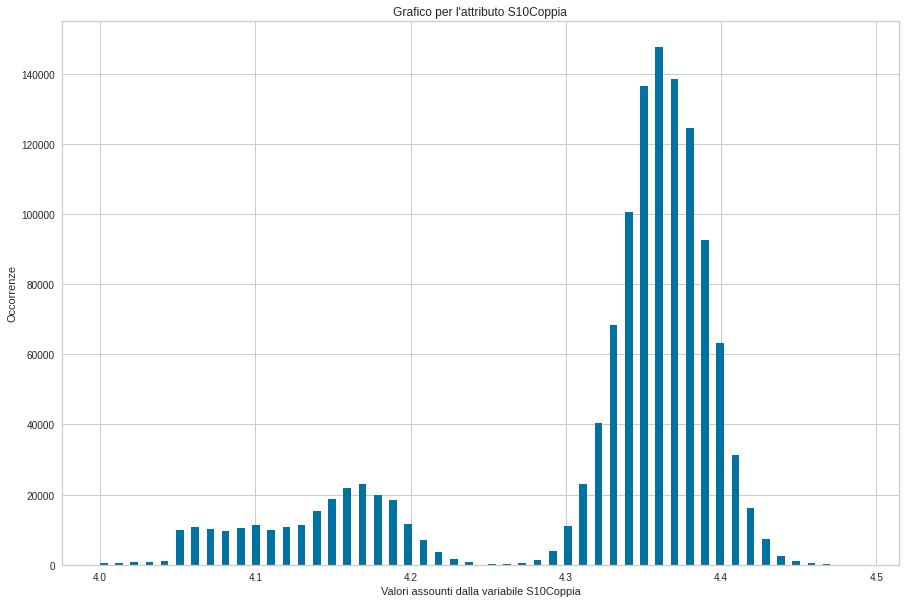

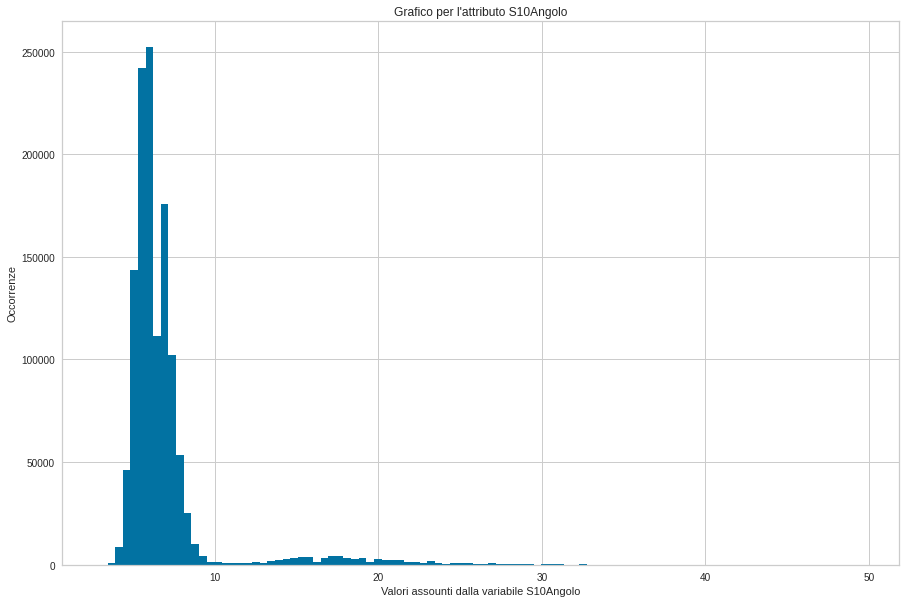

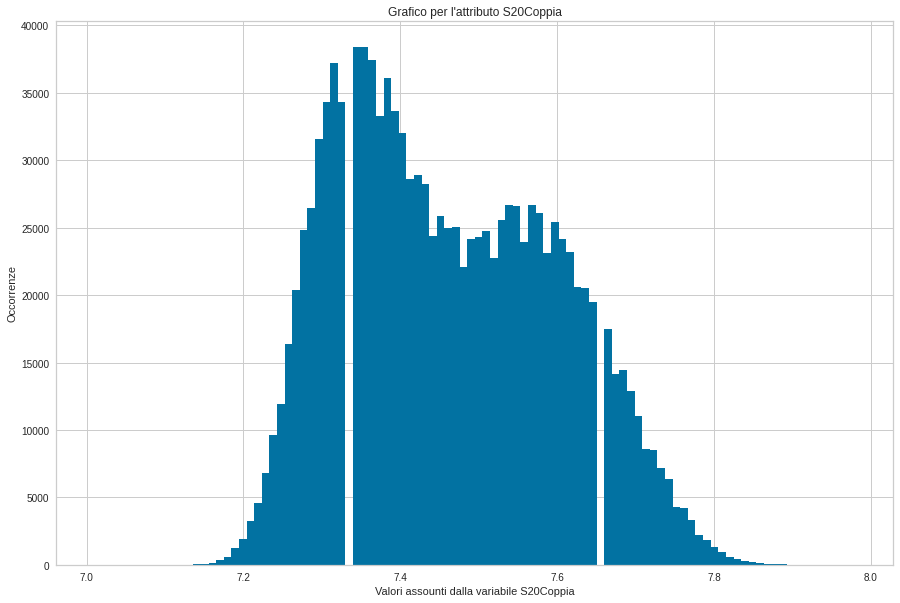

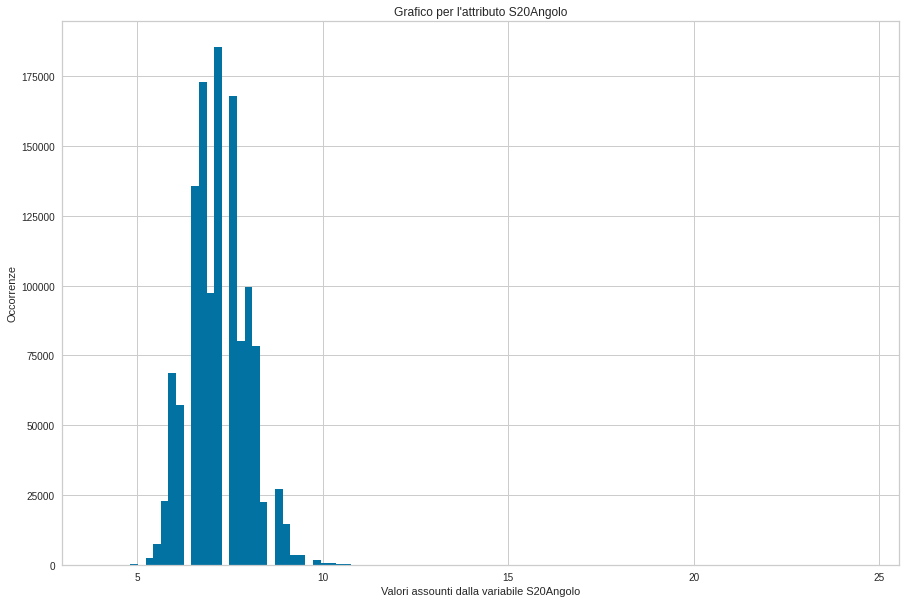

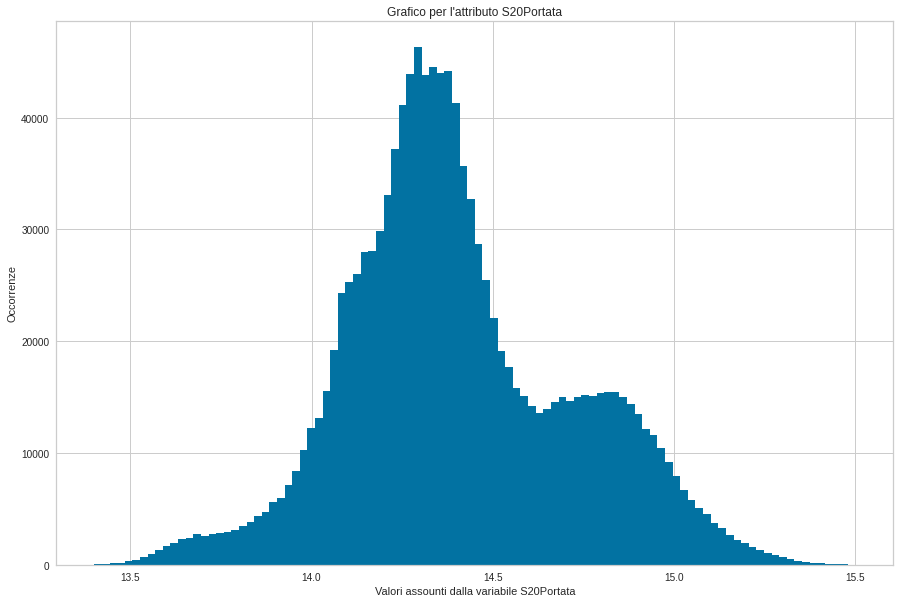

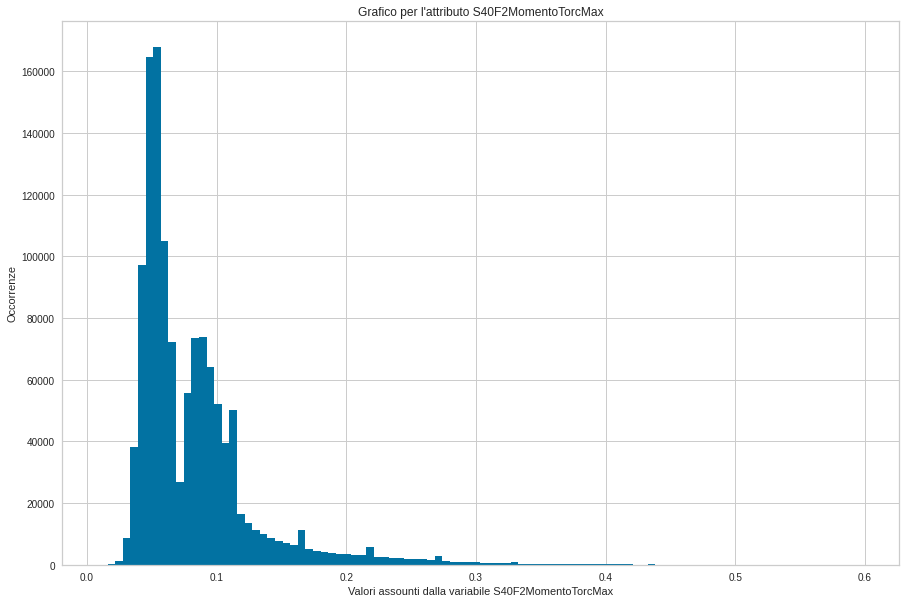

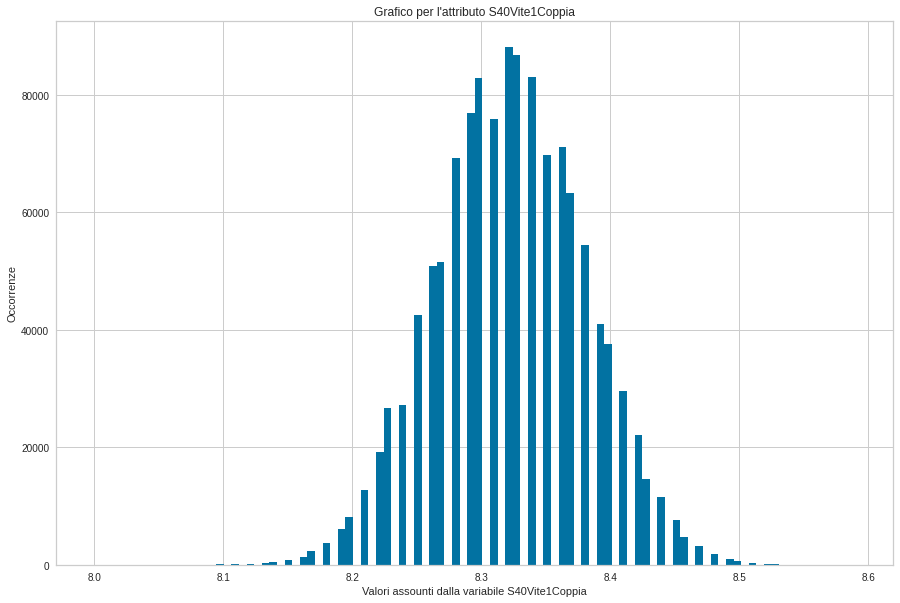

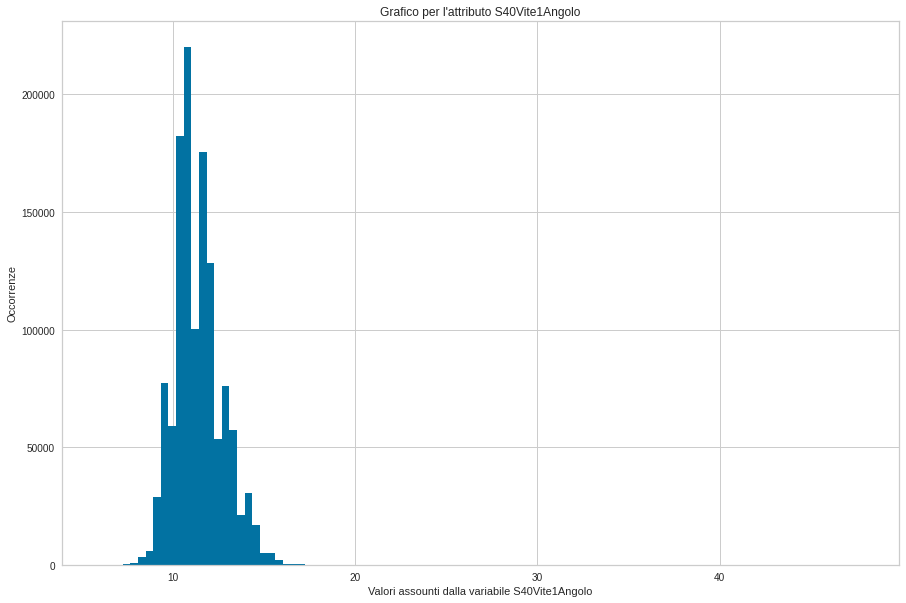

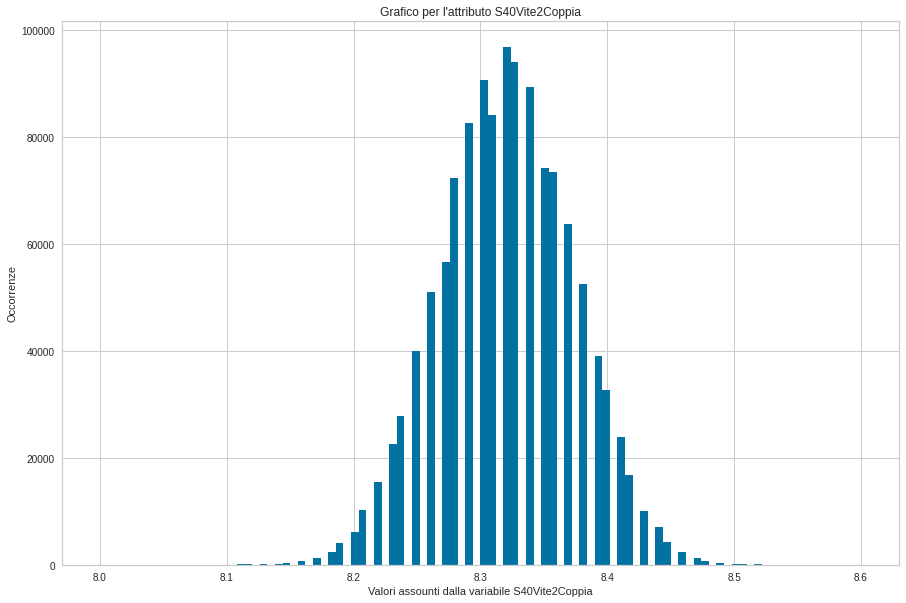

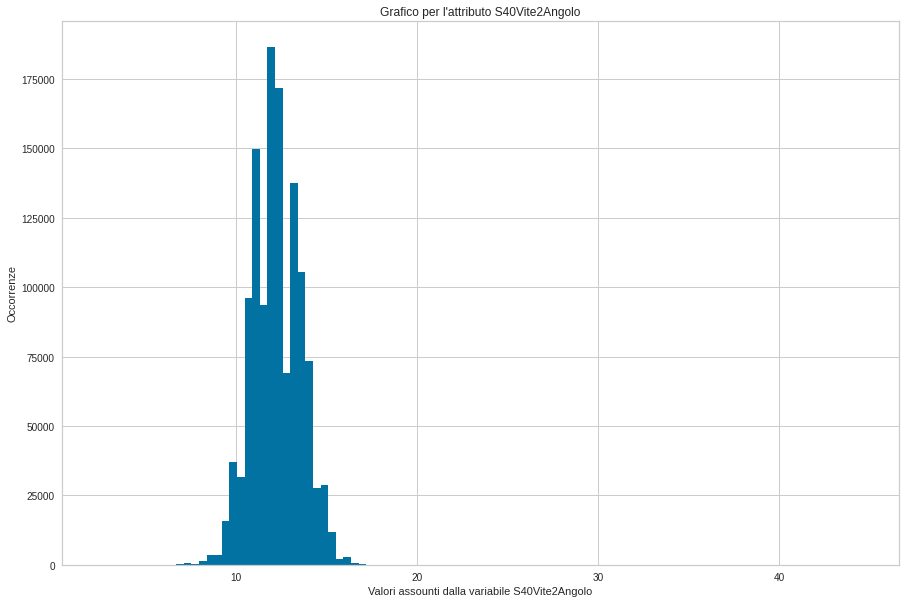

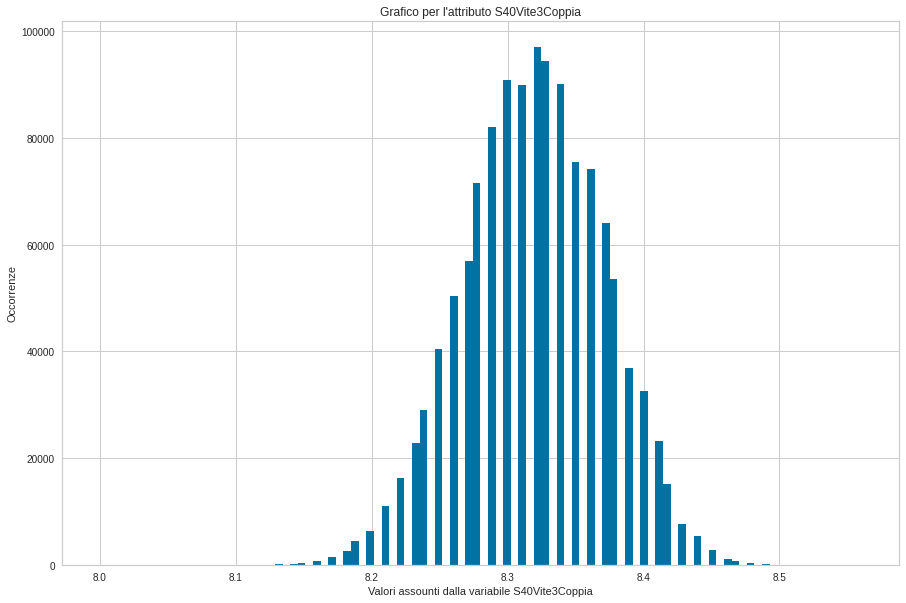

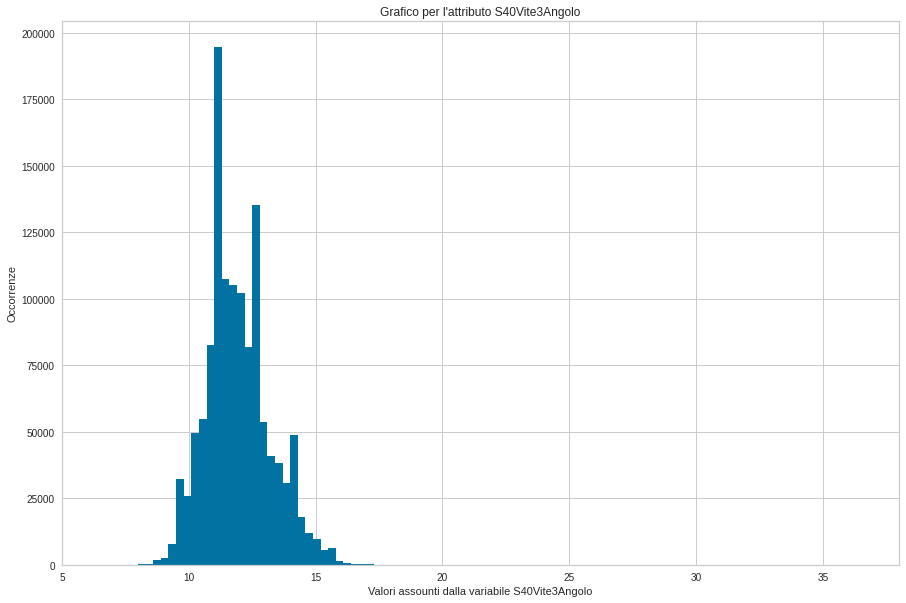

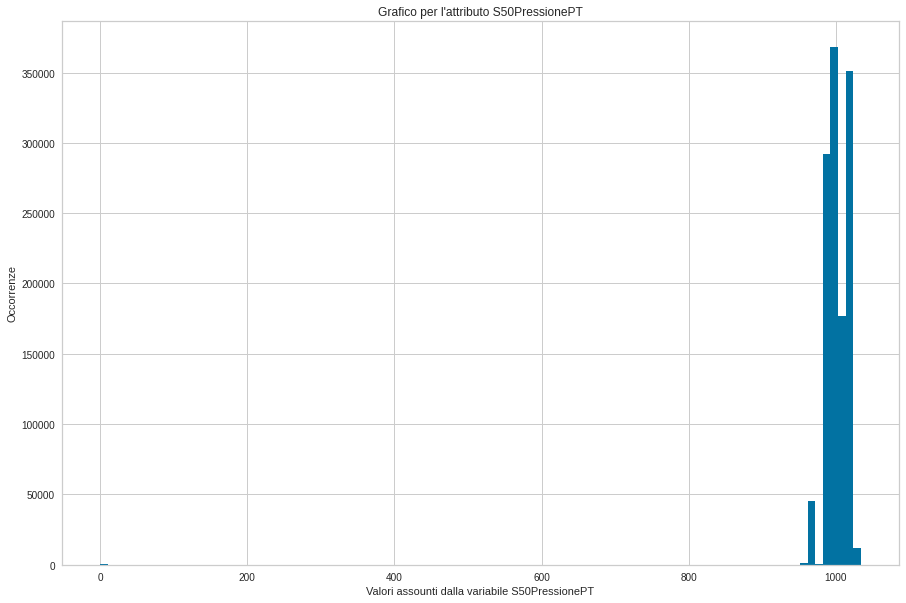

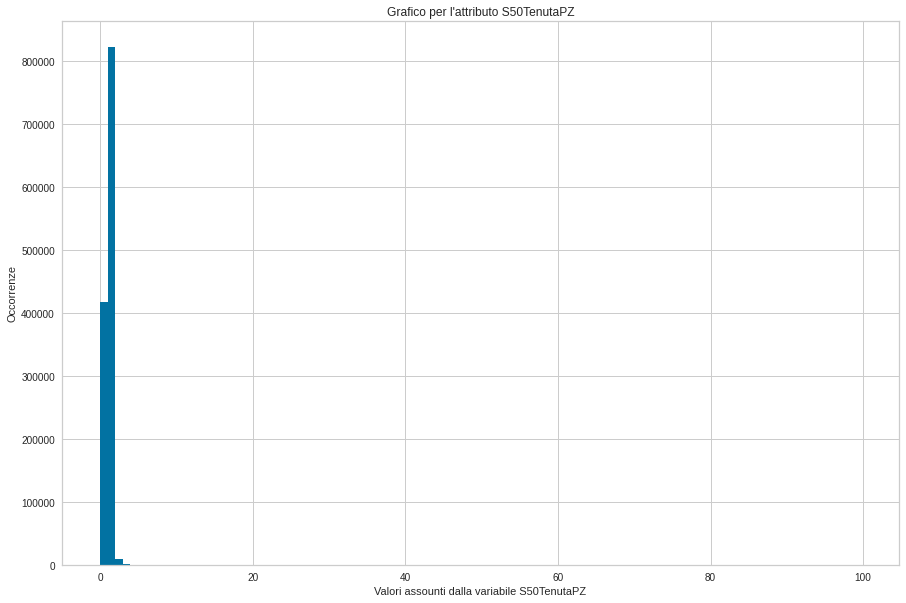

In [ ]:
for i in data2[variabili_S50].columns:
  plotgrafico(data2[str(i)])

Si procede a creare delle variabili aggiuntive che corrispondono ad un tentativo di normalizzazione delle variabili

In [ ]:
data2["S10AngoloNorm"] = 1/np.log(data2["S10Angolo"])
data2["S20AngoloNorm"] = 1/np.log(data2["S20Angolo"])
data2["S40F2MomentoTorcMaxNorm"] = np.log(data2["S40F2MomentoTorcMax"])
data2["S40Vite1AngoloNorm"] = 1/np.log(data2["S40Vite1Angolo"])
data2["S40Vite3AngoloNorm"] = 1/np.log(data2["S40Vite3Angolo"])
data2["S50TenutaPZNorm"] = 1/(np.log(data2["S50TenutaPZ"]+1)+1)

In [ ]:
variabili_S50.append("S10AngoloNorm")
variabili_S50.append("S20AngoloNorm")
variabili_S50.append("S40F2MomentoTorcMaxNorm")
variabili_S50.append("S40Vite1AngoloNorm")
variabili_S50.append("S40Vite3AngoloNorm")
variabili_S50.append("S50TenutaPZNorm")

###Eliminazione degli outlier per le variabili della stazione S50

####S50TenutaPZ

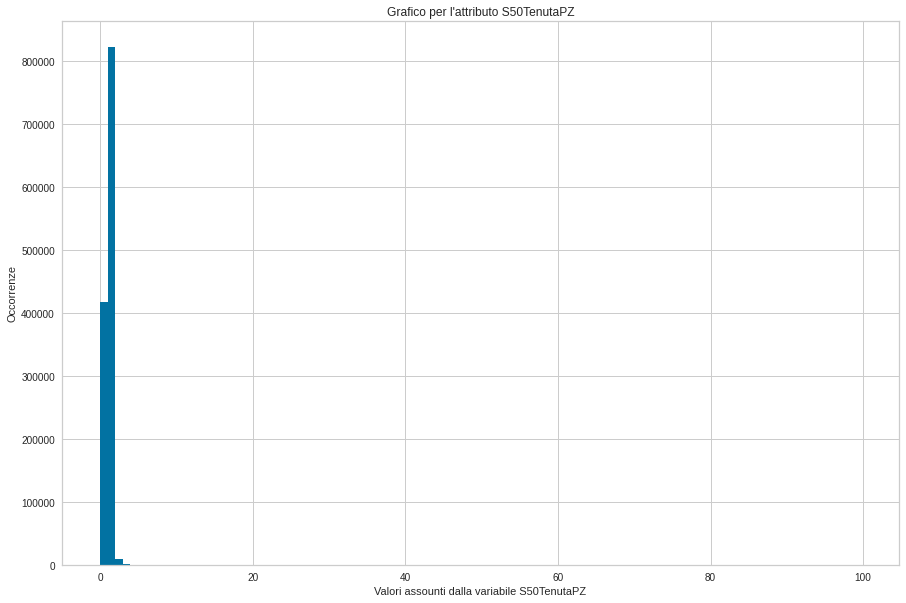

In [ ]:
plotgrafico(data2["S50TenutaPZ"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S50TenutaPZ) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

DMC  UltimaStazione  ... S40Vite3AngoloNorm S50TenutaPZNorm
366      NaN              40  ...           0.399118        0.276442
724      NaN              40  ...           0.386997        0.350104
1388     NaN              40  ...           0.392845        0.281118
1679     NaN              40  ...           0.378923        0.279313
2286     NaN              40  ...           0.405868        0.339454
...      ...             ...  ...                ...             ...
1249936  NaN              40  ...           0.405868        0.210758
1250430  NaN              40  ...           0.399118        0.203334
1250971  NaN              40  ...           0.373951        0.196619
1251031  NaN              40  ...           0.378923        0.234635
1251826  NaN              50  ...           0.421069        0.220928

[2087 rows x 56 columns]

IQR

73235


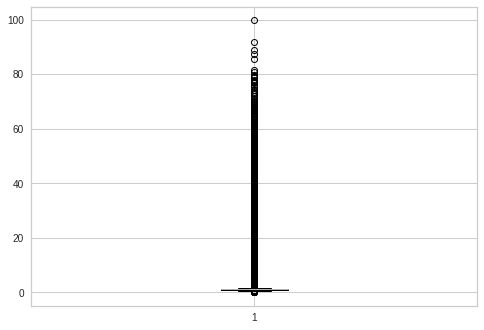

In [ ]:
Q1, Q3 = np.quantile(data2.S50TenutaPZ, [0.25, 0.75])
IQR = iqr(data2.S50TenutaPZ)
mask = (data2.S50TenutaPZ < Q1 - 1.5 * IQR) | (data2.S50TenutaPZ > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S50TenutaPZ);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

0.4499998688697815 1.6500001549720764


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo più ampio che possa contenere i valori positivi limitati con un estremo superiore pari a 3

In [ ]:
temp = data2[data2.S50TenutaPZ <= 3]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1251948
Gli outlier eliminati sono: 3074
I dati finali sono: 1248874


70161


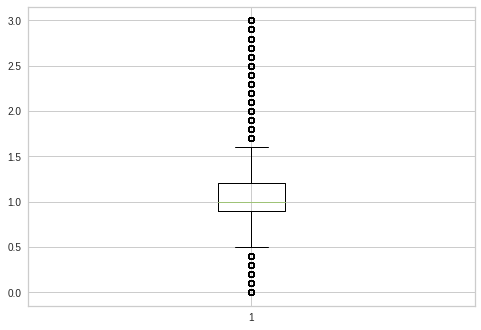

In [ ]:
Q1, Q3 = np.quantile(temp.S50TenutaPZ, [0.25, 0.75])
IQR = iqr(temp.S50TenutaPZ)
mask = (temp.S50TenutaPZ < Q1 - 1.5 * IQR) | (temp.S50TenutaPZ > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S50TenutaPZ);

In [ ]:
data2 = data2[data2.S50TenutaPZ <=3]

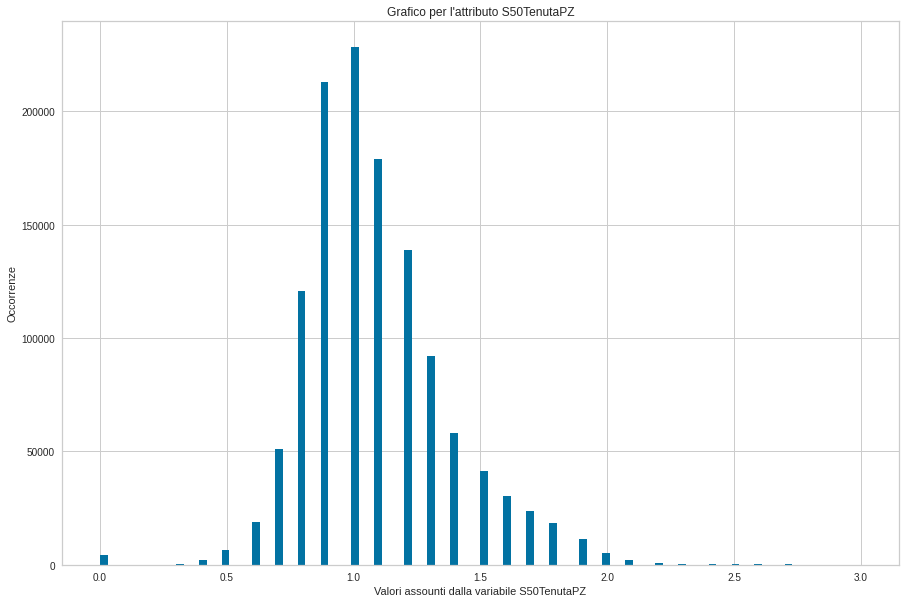

In [ ]:
plotgrafico(data2["S50TenutaPZ"])

####S50PressionePT

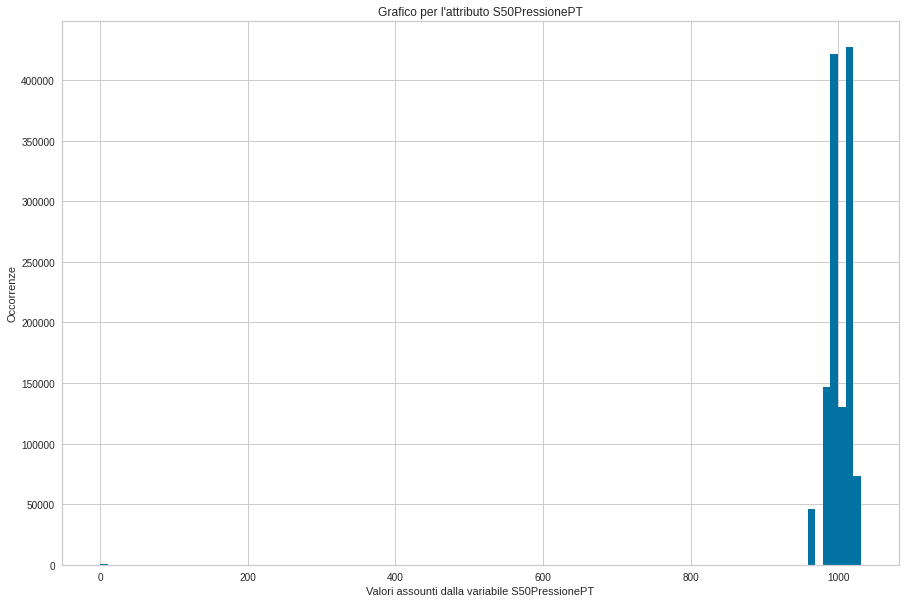

In [ ]:
plotgrafico(data2["S50PressionePT"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S50PressionePT) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

Empty DataFrame
Columns: [DMC, UltimaStazione, Data_Ingresso, Data_Uscita, Esito_S10, Esito_S20, Esito_S40, Esito_S50, Esito_S60, S10Coppia, S10Angolo, S20Coppia, S20Angolo, S20Portata, S40F2MomentoTorcMax, S40Vite1Coppia, S40Vite1Angolo, S40Vite2Coppia, S40Vite2Angolo, S40Vite3Coppia, S40Vite3Angolo, S50PressionePT, S50TenutaPZ, S60F2DepresMin, S60F2Coppia, S60F2Velocita, S60F2TenutaVNR, Data_Ingresso_day, Data_Ingresso_month, Data_Ingresso_year, Success, outlier, S10AngoloINT, S10CoppiaINT, S20AngoloINT, S20PortataINT, S20CoppiaINT, S40Vite2CoppiaINT, S40Vite2AngoloINT, S40Vite1CoppiaINT, S40Vite1AngoloINT, S40Vite3CoppiaINT, S40Vite3AngoloINT, S40F2MomentoTorcMaxINT, S50PressionePTINT, S50TenutaPZINT, S60F2CoppiaINT, S60F2DepresMinINT, S60F2VelocitaINT, S60F2TenutaVNRINT, S10AngoloNorm, S20AngoloNorm, S40F2MomentoTorcMaxNorm, S40Vite1AngoloNorm, S40Vite3AngoloNorm, S50TenutaPZNorm]
Index: []

IQR

3886


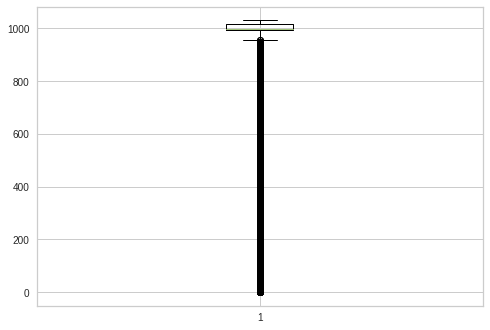

In [ ]:
Q1, Q3 = np.quantile(data2.S50PressionePT, [0.25, 0.75])
IQR = iqr(data2.S50PressionePT)
mask = (data2.S50PressionePT < Q1 - 1.5 * IQR) | (data2.S50PressionePT > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S50PressionePT);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

957.3500061035156 1050.5499572753906


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo più ampio che possa contenere i valori dell'intervallo di accettazione e che sia limitato superiormente a poco più del valore massimo di accettazione

In [ ]:
temp = data2[(data2.S50PressionePT >= 900) & (data2.S50PressionePT <= 1200)]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1248874
Gli outlier eliminati sono: 3563
I dati finali sono: 1245311


323


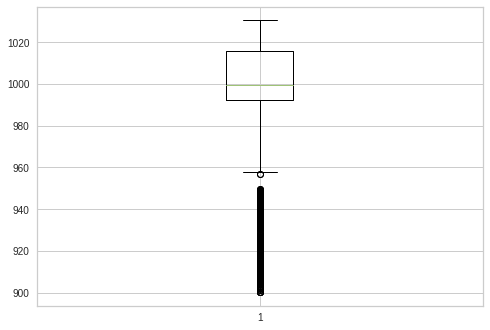

In [ ]:
Q1, Q3 = np.quantile(temp.S50PressionePT, [0.25, 0.75])
IQR = iqr(temp.S50PressionePT)
mask = (temp.S50PressionePT < Q1 - 1.5 * IQR) | (temp.S50PressionePT > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S50PressionePT);

In [ ]:
data2 = data2[(data2.S50PressionePT >= 900) & (data2.S50PressionePT <= 1200)]

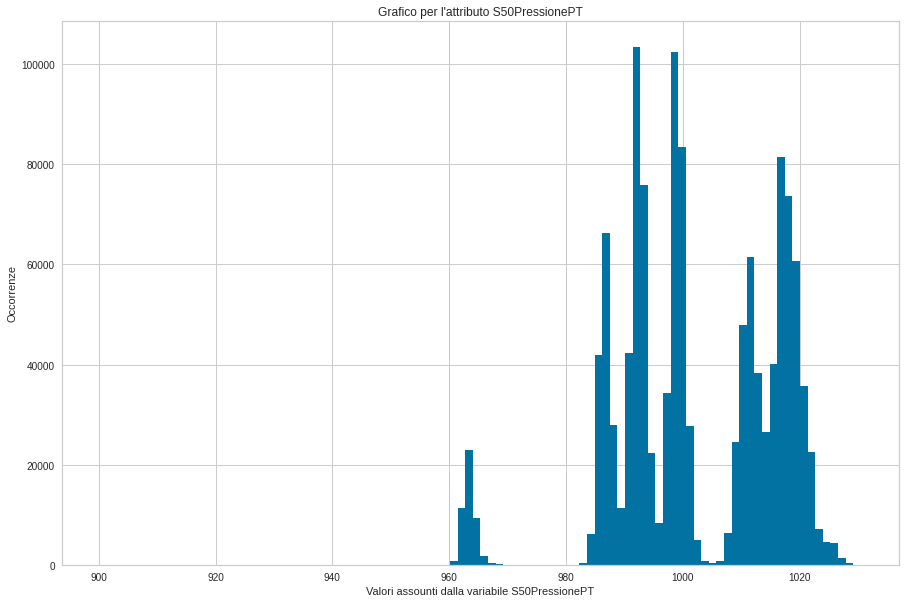

In [ ]:
plotgrafico(data2["S50PressionePT"])

###Analisi di Regressione

###Regressione sulla variabile S50TenutaPZ

Matrice di correlazione sulle variabili di data2

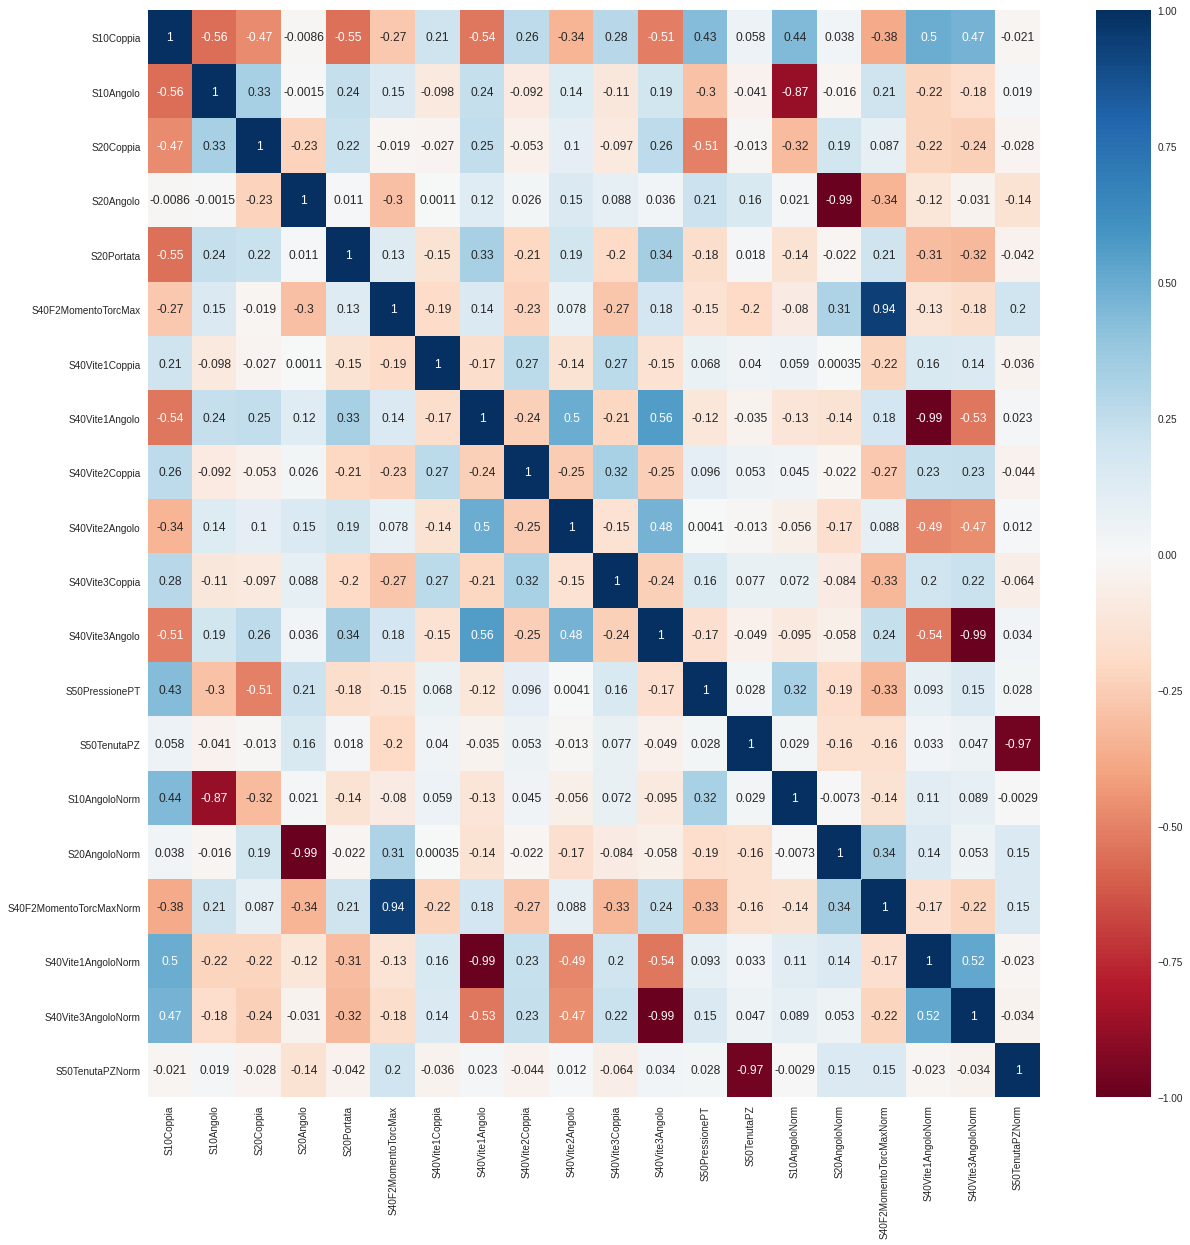

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S50].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("I(np.log(S50TenutaPZ+1)) ~ I(np.log(S20Coppia)) + I(np.log(S20Angolo)) + I(np.log(S20Portata)) + I(np.log(S40F2MomentoTorcMax)) + I(np.log(S40Vite1Coppia)) + I(np.log(S40Vite1Angolo)) + I(np.log(S40Vite2Coppia)) + I(np.log(S40Vite2Angolo)) + I(np.log(S40Vite3Coppia)) + I(np.log(S40Vite3Angolo))", data = data2, return_type = "dataframe")

In [ ]:
y, X = dmatrices("S50TenutaPZ ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            S50TenutaPZ   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     7921.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:17:41   Log-Likelihood:            -1.5806e+05
No. Observations:             1245311   AIC:                         3.161e+05
Df Residuals:                 1245301   BIC:                         3.163e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.5054    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 47147.86055463098, 'LM-Test p-value': 0.0, 'F-Statistic': 5444.748990592476, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0  67020.046752            Intercept
1      1.237070            S20Coppia
2      1.257811            S20Angolo
3      1.219010           S20Portata
4      1.290482  S40F2MomentoTorcMax
5      1.146228       S40Vite1Coppia
6      1.592578       S40Vite1Angolo
7      1.234873       S40Vite2Coppia
8      1.245663       S40Vite3Coppia
9      1.583478       S40Vite3Angolo

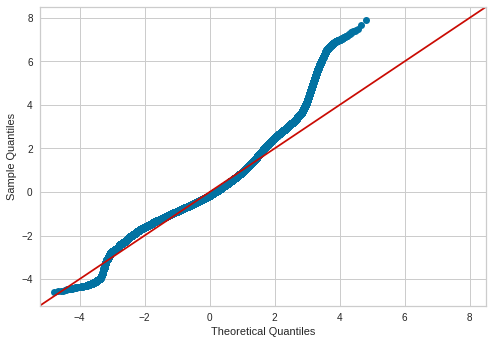

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

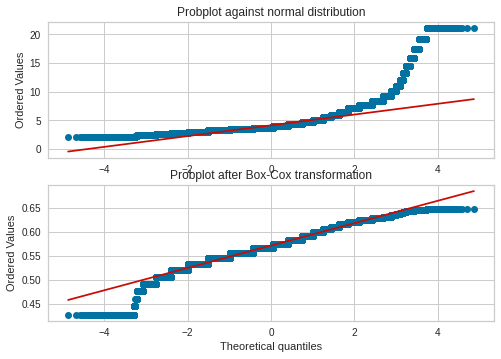

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(np.exp(data2["S50TenutaPZ"])+1, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(np.exp(data2["S50TenutaPZ"])+1)
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(np.log(var_norm)-1, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8268.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:17:57   Log-Likelihood:             2.2335e+06
No. Observations:             1245311   AIC:                        -4.467e+06
Df Residuals:                 1245301   BIC:                        -4.467e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9763    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 31675.8822021982, 'LM-Test p-value': 0.0, 'F-Statistic': 3611.3735416123895, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0  67020.046752            Intercept
1      1.237070            S20Coppia
2      1.257811            S20Angolo
3      1.219010           S20Portata
4      1.290482  S40F2MomentoTorcMax
5      1.146228       S40Vite1Coppia
6      1.592578       S40Vite1Angolo
7      1.234873       S40Vite2Coppia
8      1.245663       S40Vite3Coppia
9      1.583478       S40Vite3Angolo

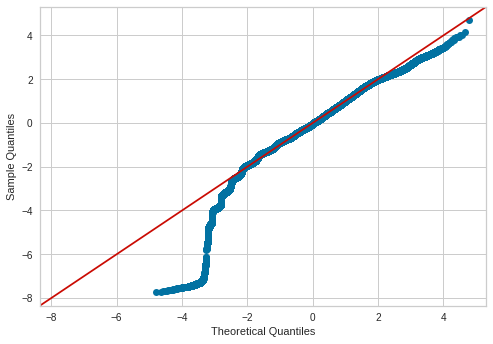

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Il modello di regressione sulla variabile S50TenutaPZ non ha portato ad esiti adeguati per spiegare una relazione valida tra le variabili; il problema è dovuto alla non normalità dei residui (come si può osservare dal grafico sopra) che non è possibile risolvere con applicazione di funzioni alla variabile dipendente o alle variabili esplicative;
<br>La trasformazione Box & Cox non ha portato ad esiti positivi per la normalizzazione della variabile.
<br>Si potrebbe pensare di rimuovere ulteriori outlier ma ciò porterebbe a minacciare la veridicità del modello eliminando osservazioni importanti.

###Regressione sulla variabile S50PressionePT

Matrice di correlazione sulle variabili di data2

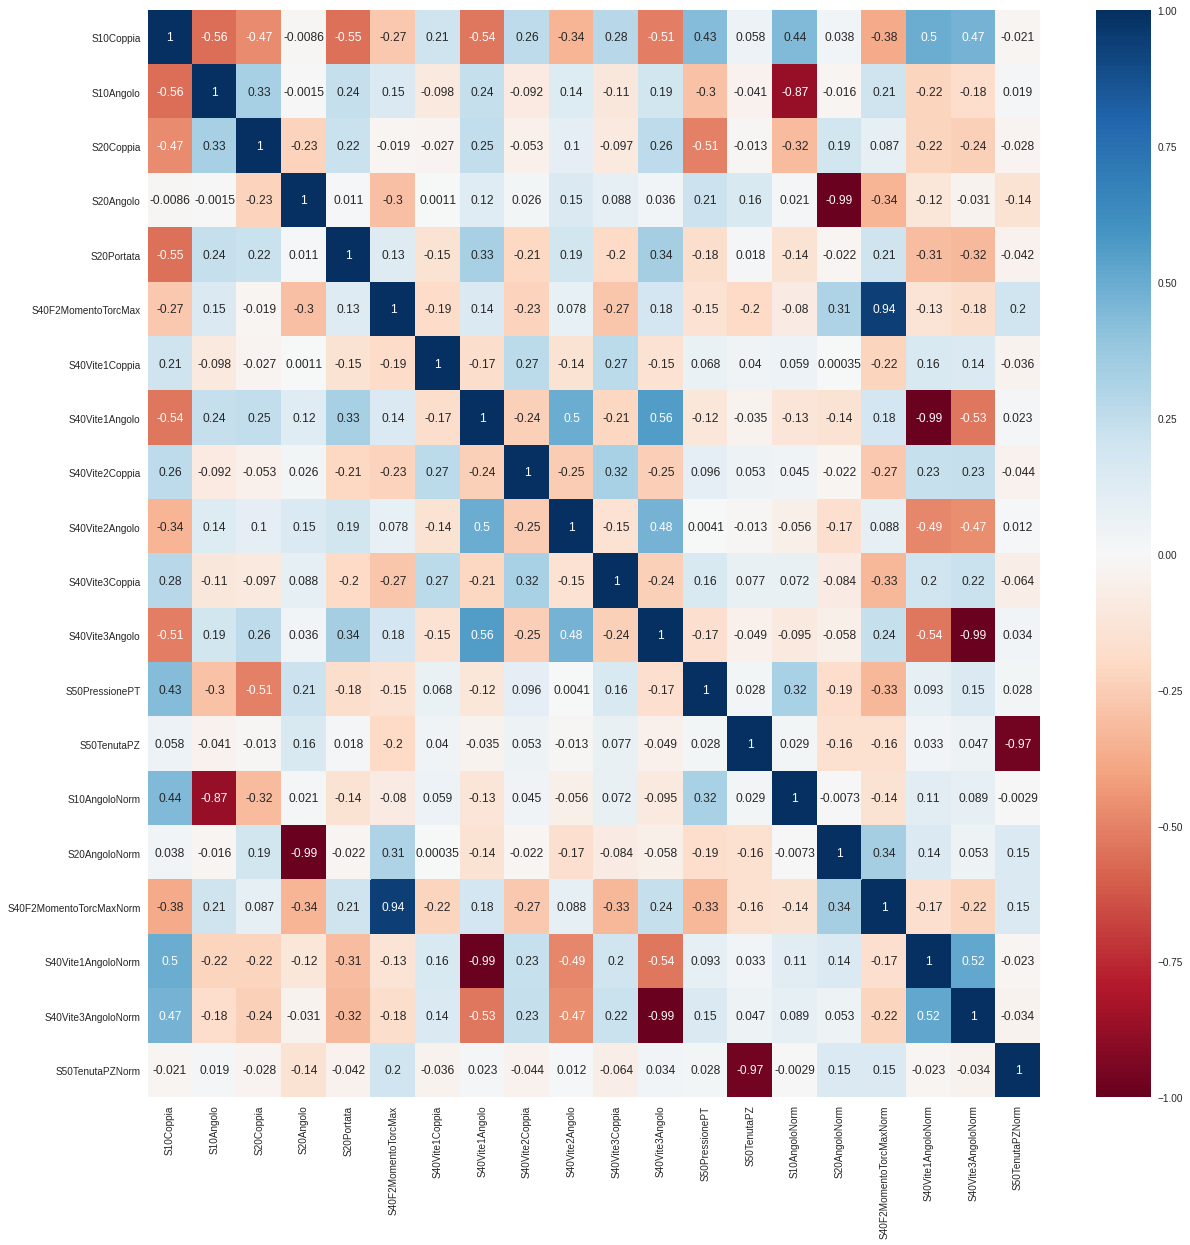

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S50].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("I(S50PressionePT) ~ I(np.log(S20Coppia)) + I(np.log(S20Angolo)) + I(np.log(S20Portata)) + I(np.log(S40F2MomentoTorcMax)) + I(np.log(S40Vite1Coppia)) + I(np.log(S40Vite1Angolo)) + I(np.log(S40Vite2Coppia)) + I(np.log(S40Vite2Angolo)) + I(np.log(S40Vite3Coppia)) + I(np.log(S40Vite3Angolo))", data = data2, return_type = "dataframe")

In [ ]:
y, X = dmatrices("I(S50PressionePT**3) ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite2Angolo + S40Vite3Coppia + S40Vite3Angolo", data = data2, return_type = "dataframe")

In [ ]:
y, X = dmatrices("I(S50PressionePT) ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite2Angolo + S40Vite3Coppia + S40Vite3Angolo", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:      I(S50PressionePT)   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                 5.341e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:18:14   Log-Likelihood:            -4.8303e+06
No. Observations:             1245311   AIC:                         9.661e+06
Df Residuals:                 1245300   BIC:                         9.661e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1157.7709    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 139413.77105518576, 'LM-Test p-value': 0.0, 'F-Statistic': 15698.74347733683, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   68057.156659            Intercept
1       1.238650            S20Coppia
2       1.270411            S20Angolo
3       1.220111           S20Portata
4       1.290975  S40F2MomentoTorcMax
5       1.147081       S40Vite1Coppia
6       1.744136       S40Vite1Angolo
7       1.253810       S40Vite2Coppia
8       1.494193       S40Vite2Angolo
9       1.245700       S40Vite3Coppia
10      1.706583       S40Vite3Angolo

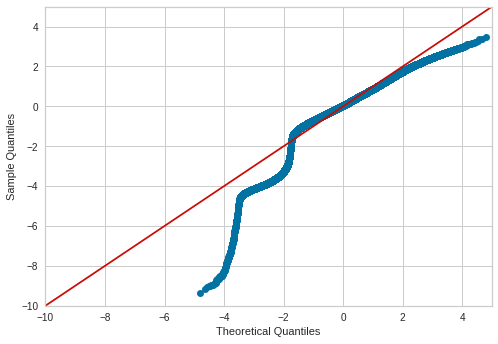

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

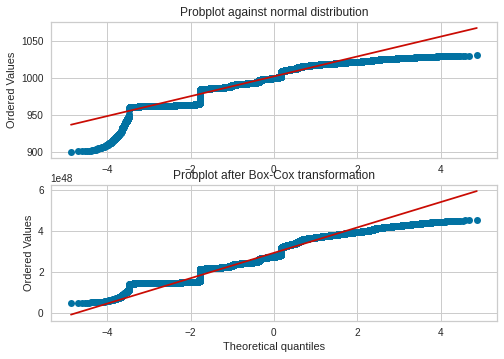

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(data2["S50PressionePT"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(data2["S50PressionePT"])
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(var_norm, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 6.419e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:18:32   Log-Likelihood:            -1.3858e+08
No. Observations:             1245311   AIC:                         2.772e+08
Df Residuals:                 1245300   BIC:                         2.772e+08
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.355e+49   1

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 151832.45508313438, 'LM-Test p-value': 0.0, 'F-Statistic': 17291.32749736779, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   68057.156659            Intercept
1       1.238650            S20Coppia
2       1.270411            S20Angolo
3       1.220111           S20Portata
4       1.290975  S40F2MomentoTorcMax
5       1.147081       S40Vite1Coppia
6       1.744136       S40Vite1Angolo
7       1.253810       S40Vite2Coppia
8       1.494193       S40Vite2Angolo
9       1.245700       S40Vite3Coppia
10      1.706583       S40Vite3Angolo

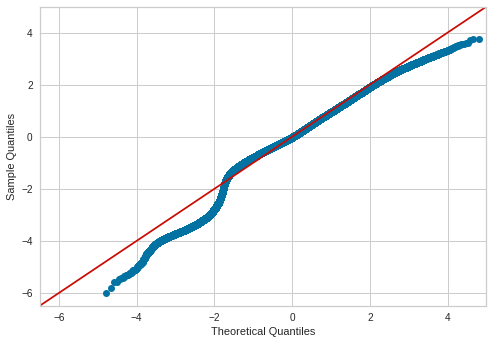

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Il modello di regressione sulla variabile S50PressionePT non ha portato ad esiti adeguati per spiegare una relazione valida tra le variabili; il problema è dovuto alla non normalità dei residui (come si può osservare dal grafico sopra) che non è possibile risolvere con applicazione di funzioni alla variabile dipendente o alle variabili esplicative;
<br>La trasformazione Box & Cox non ha portato ad esiti positivi per la normalizzazione dei residui.
<br>Si potrebbe pensare di rimuovere ulteriori outlier ma ciò porterebbe a minacciare la veridicità del modello eliminando osservazioni importanti.

##Stazione S60

Si filtra il dataset per spiegare le variabili della stazione S60 (cioè si devono considerare tutte le osservazioni che hanno esito positivo alle stazioni precedenti S10, S20, S40 e S50) lasciando libere dai controlli le variabili della stazione S60 in quanto si considera ogni loro possibile esito

In [ ]:
data2 = data2[(data2.S10CoppiaINT == 1) & (data2.S10AngoloINT == 1) & (data2.S20CoppiaINT == 1)
& (data2.S20AngoloINT == 1) &(data2.S20PortataINT == 1) & (data2.S40F2MomentoTorcMaxINT == 1)
& (data2.S40Vite1CoppiaINT == 1) & (data2.S40Vite2CoppiaINT == 1) & (data2.S40Vite3CoppiaINT == 1)
& (data2.S40Vite1AngoloINT == 1) & (data2.S40Vite2AngoloINT == 1) & (data2.S40Vite3AngoloINT == 1)
& (data2.S50TenutaPZINT == 1) & (data2.S50PressionePTINT == 1)
& (data2.Esito_S40 == 1) & (data2.Esito_S10 == 1) & (data2.Esito_S20 == 1) & (data2.Esito_S50 == 1)]

In [ ]:
data2.reset_index(drop=True, inplace = True)
len(data2)

1243745

L'esito porta a considerare un numero di osservazioni più che sufficienti che raggiungono la stazione S60

Si procede a valutare la distribuzione di ogni variabile e la sua normalizzazione

In [ ]:
variabili_S60 = ['S10Coppia',
       'S10Angolo', 'S20Coppia', 'S20Angolo', 'S20Portata',
       'S40F2MomentoTorcMax', 'S40Vite1Coppia', 'S40Vite1Angolo',
       'S40Vite2Coppia', 'S40Vite2Angolo', 'S40Vite3Coppia', 'S40Vite3Angolo',
       'S50PressionePT', 'S50TenutaPZ', 'S60F2Coppia', 'S60F2DepresMin', 
       'S60F2Velocita', 'S60F2TenutaVNR']

In [ ]:
def plotgrafico(data):
  palette = ["#ffff00", "#0000ff"]
  plt.figure(figsize=(15, 10))
  #min_value = data.min()
  #max_value = data.max()
  #print("il valore più piccolo dell'attributo è "+ str(min_value))
  #print("il valore più grande dell'attributo è "+ str(max_value))
  plt.hist(data, bins = 100)
  plt.ylabel("Occorrenze")
  plt.xlabel("Valori assounti dalla variabile " + str(data.name))
  plt.title("Grafico per l'attributo " + str(data.name))

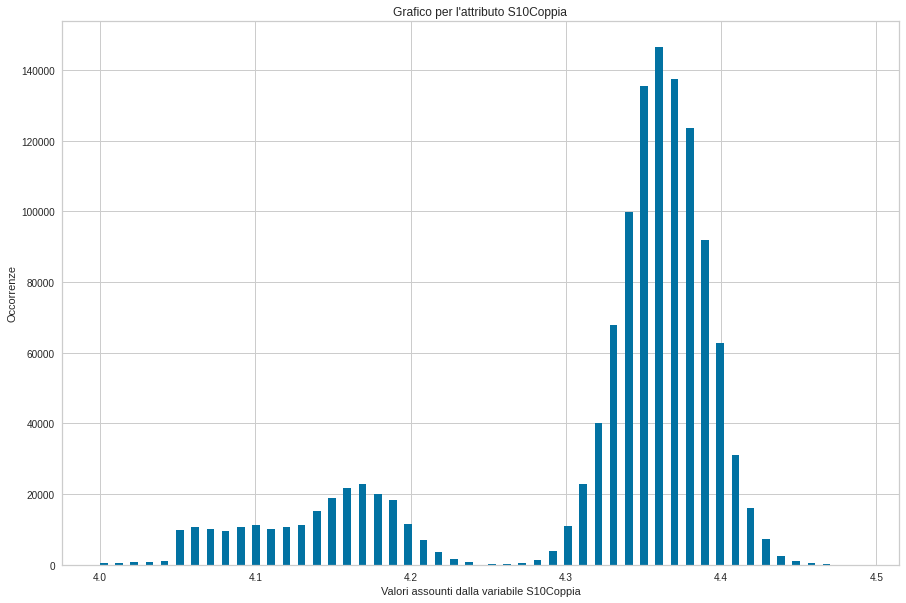

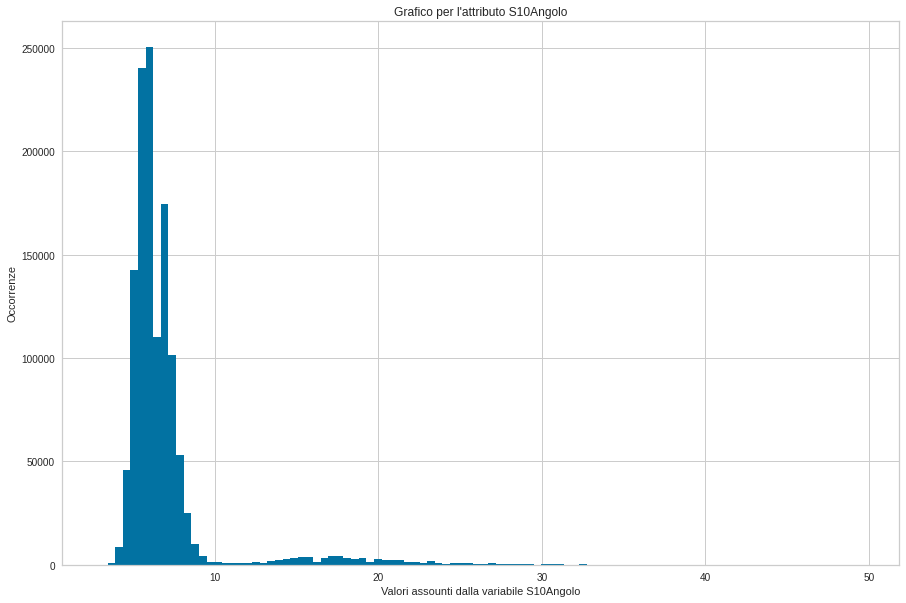

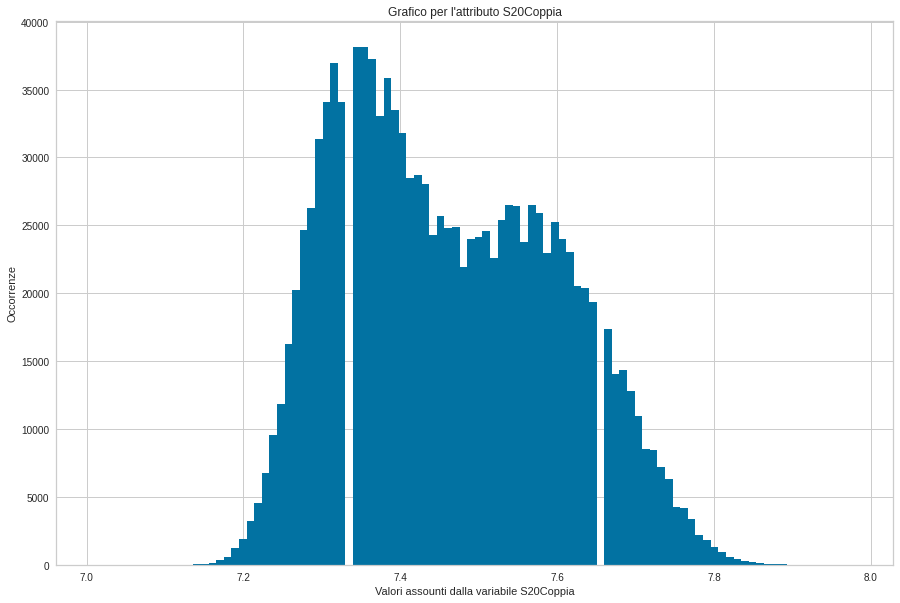

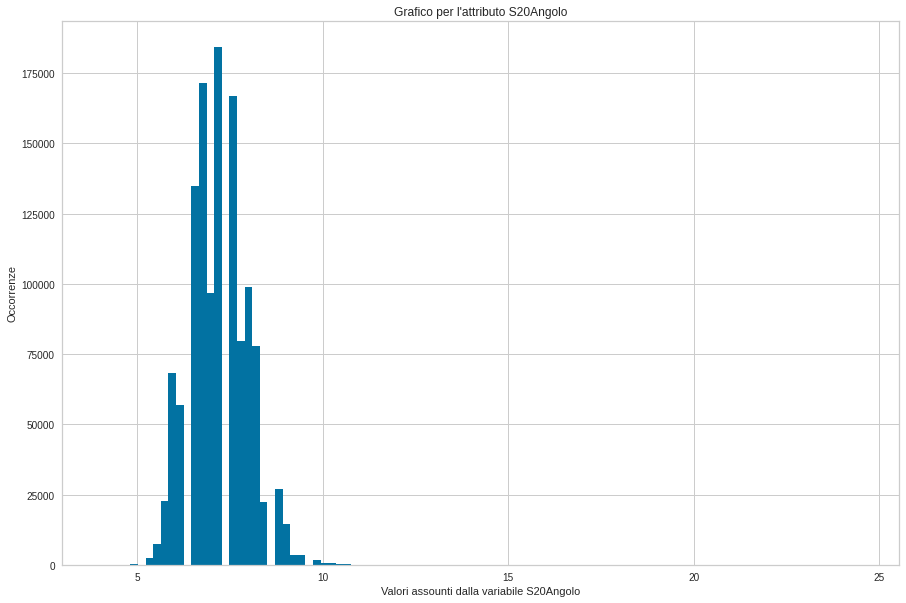

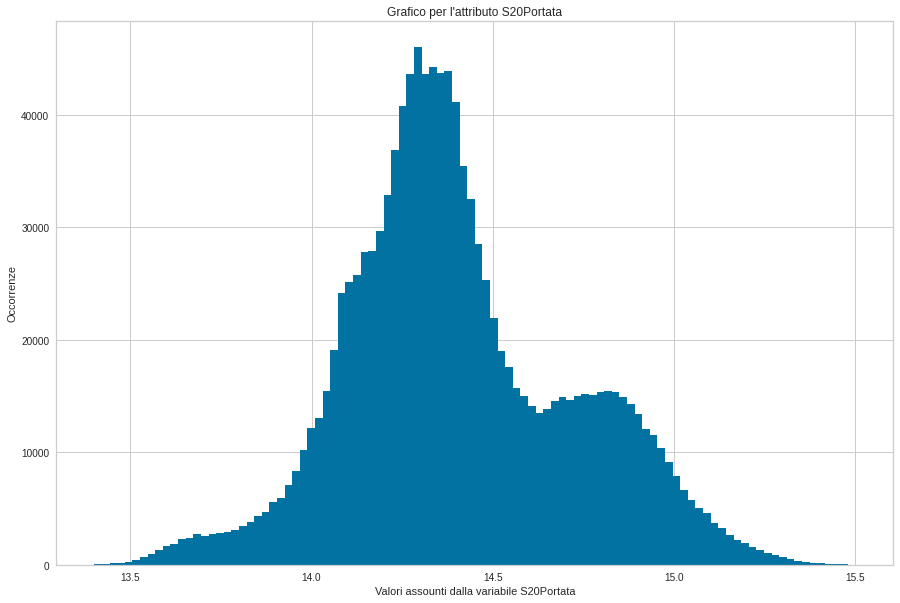

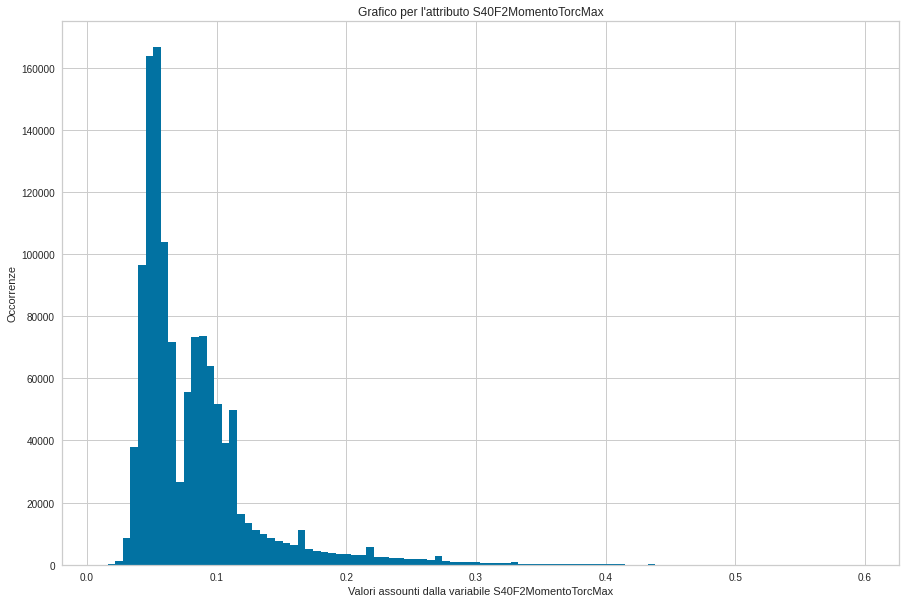

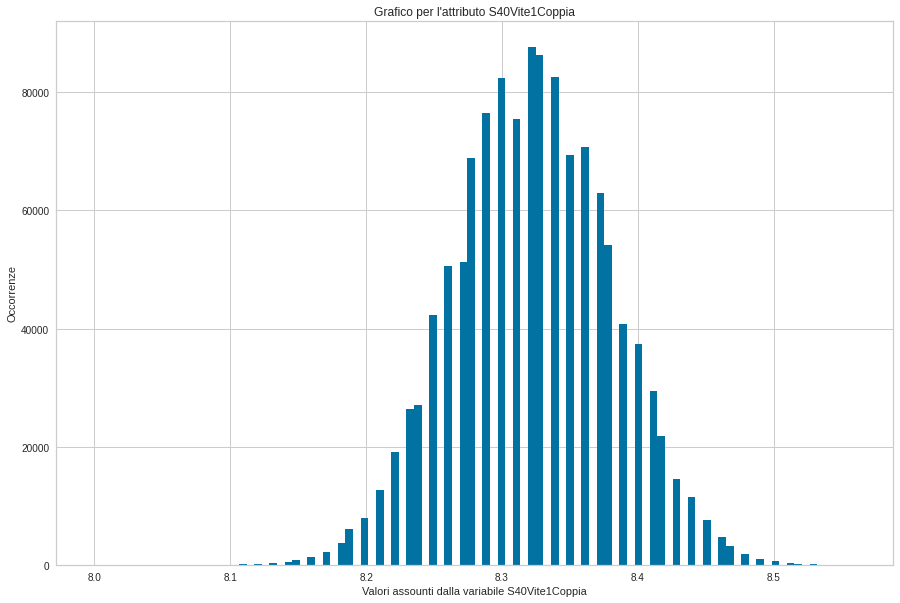

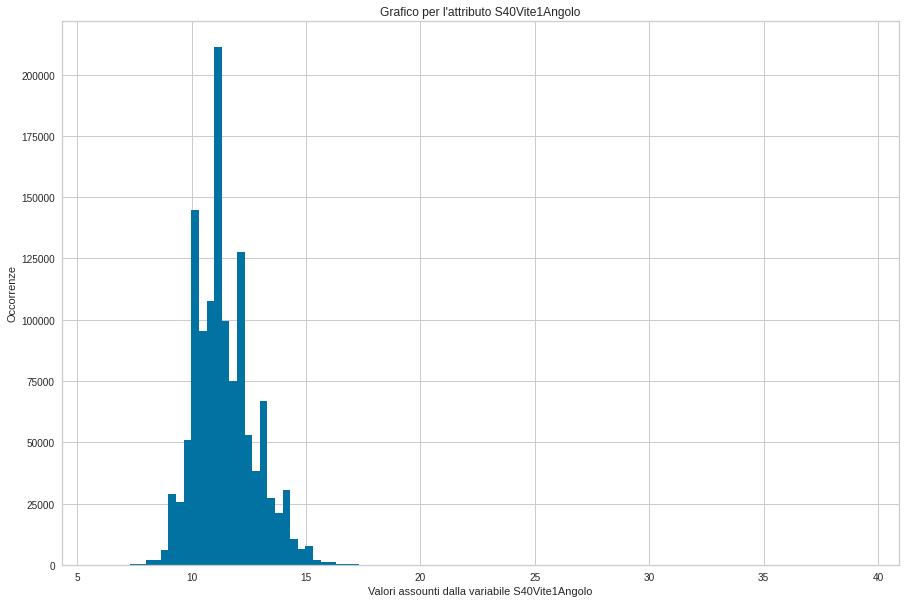

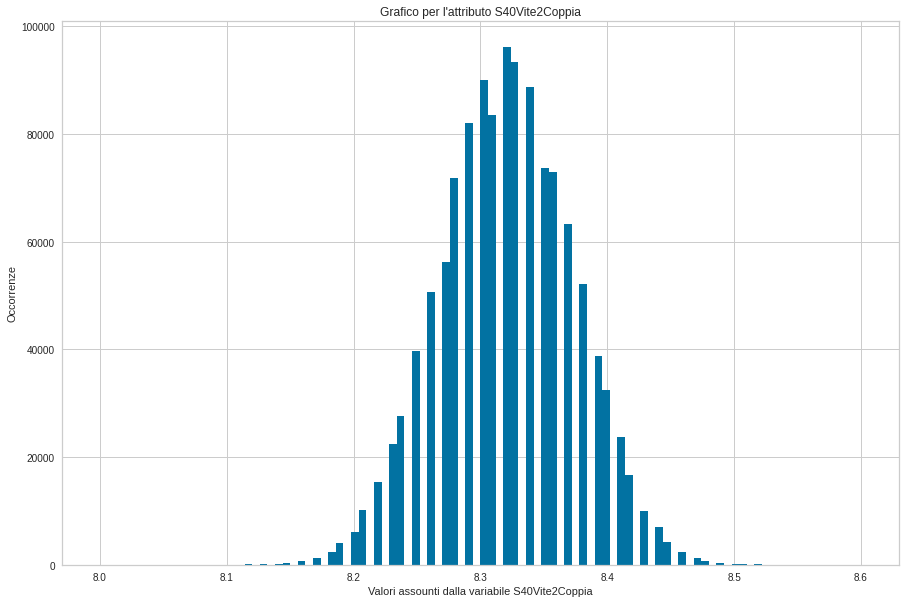

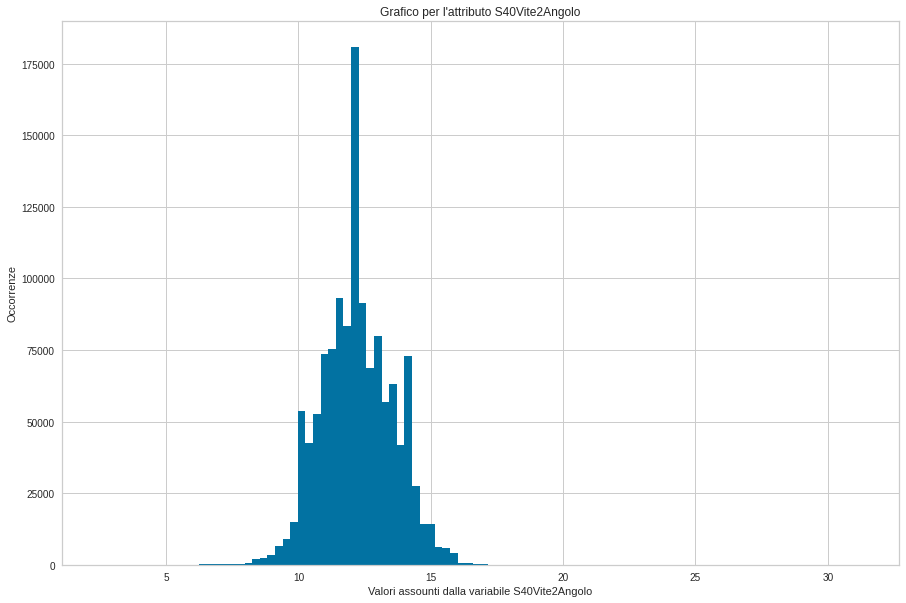

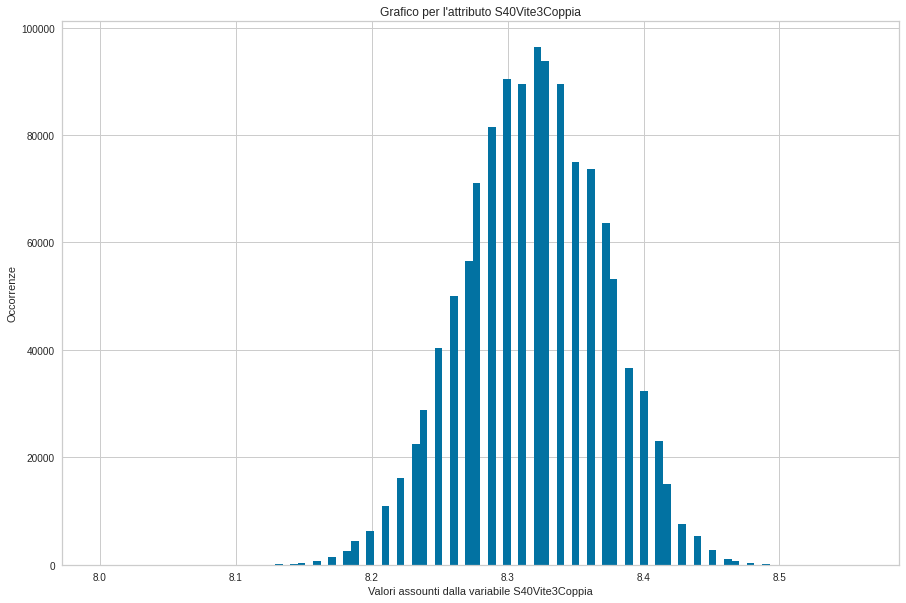

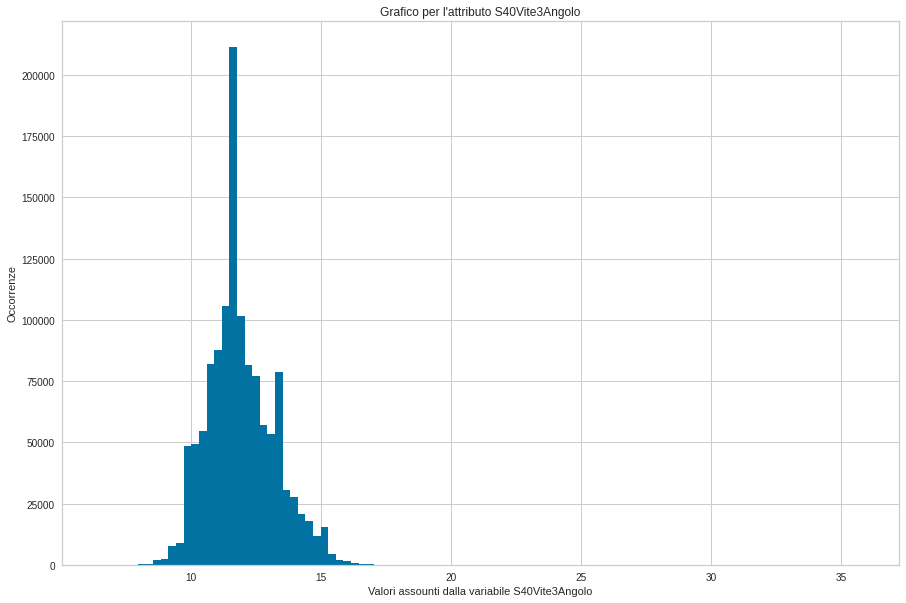

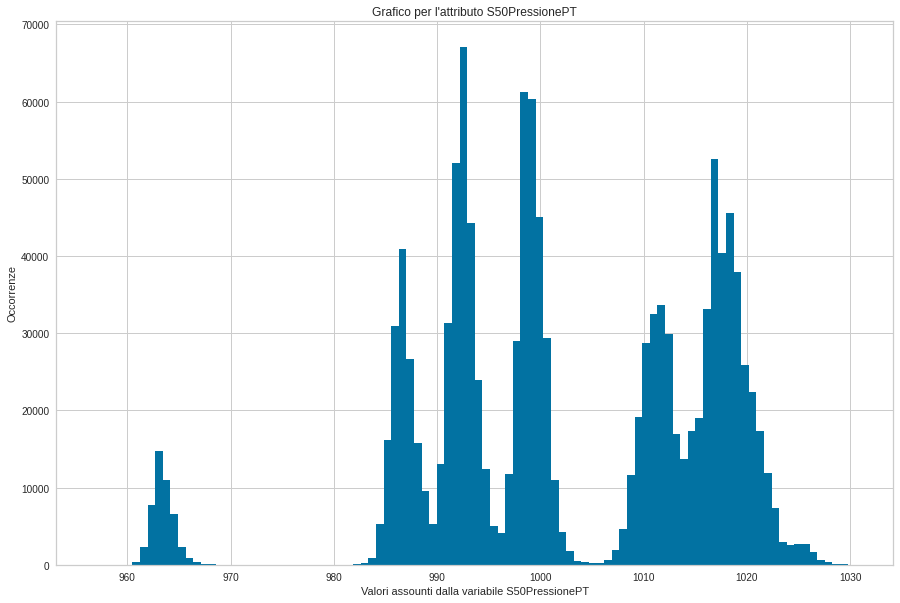

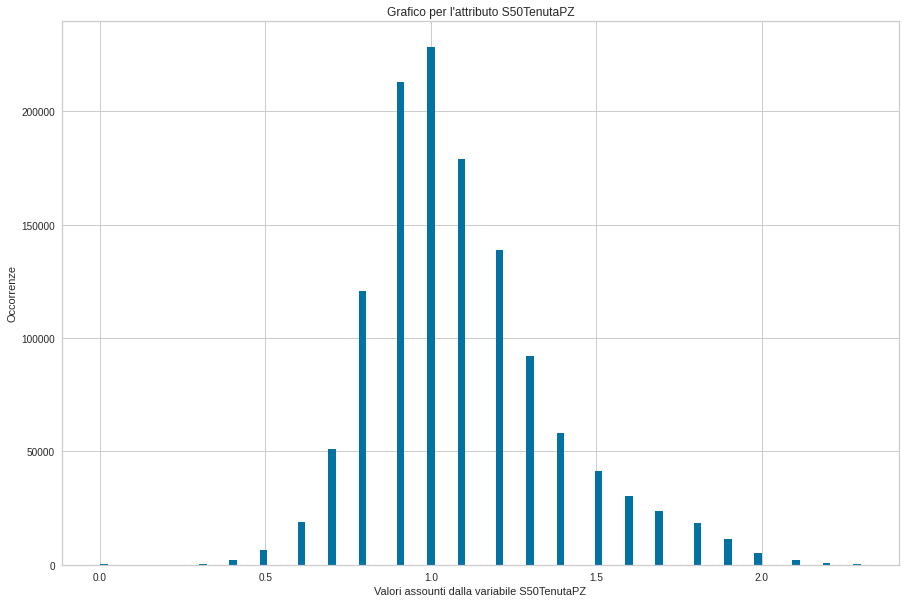

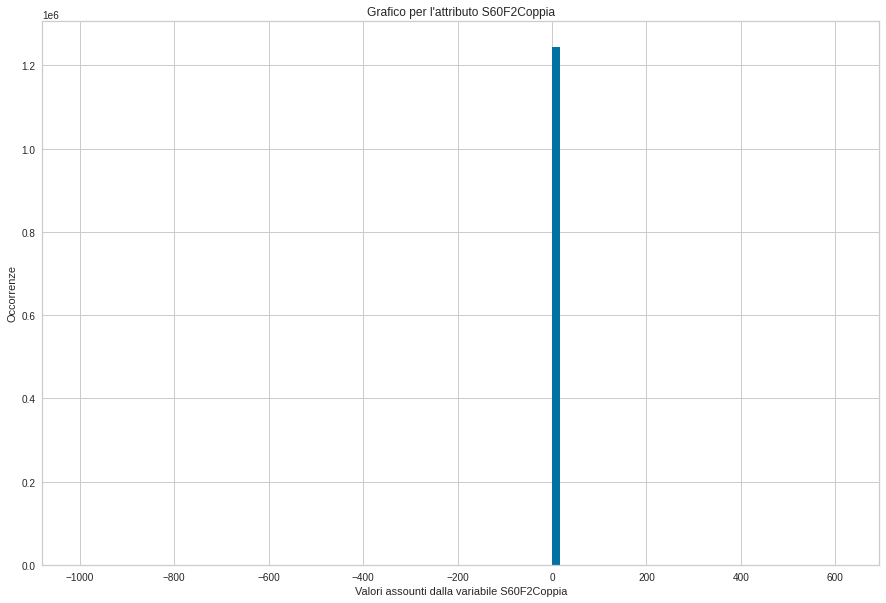

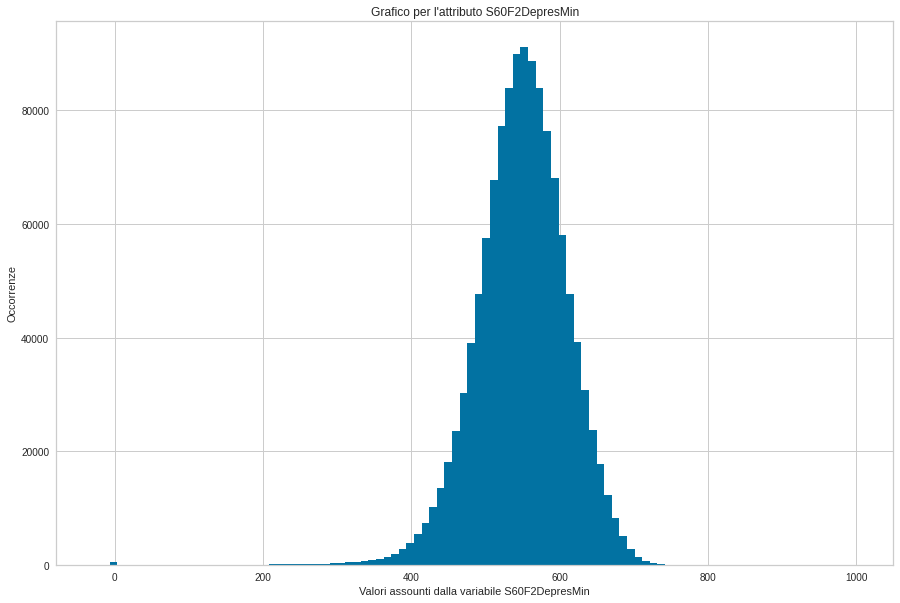

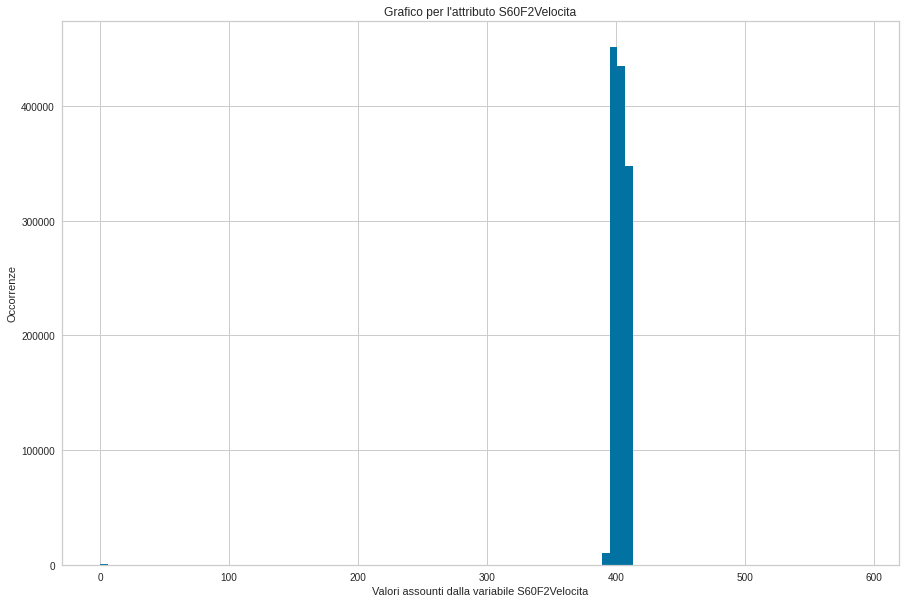

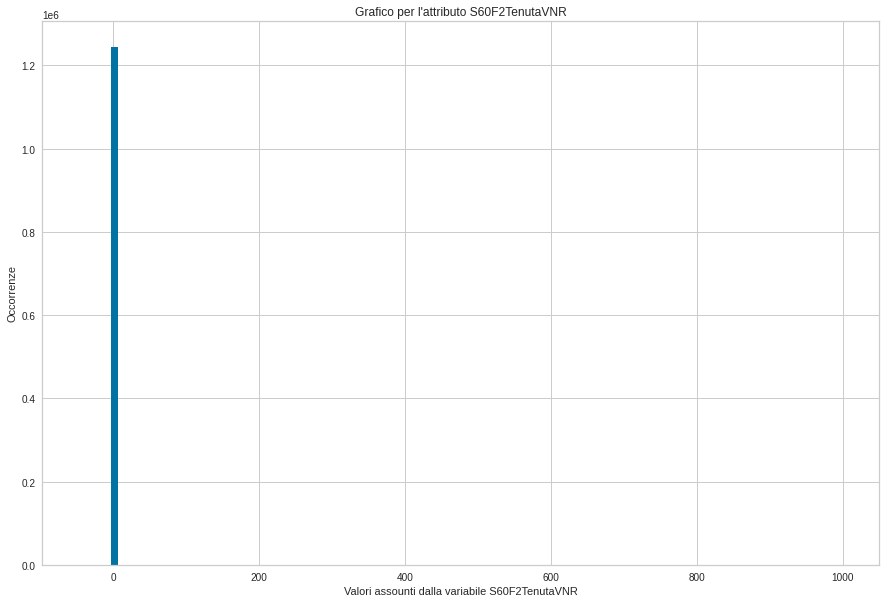

In [ ]:
for i in data2[variabili_S60].columns:
  plotgrafico(data2[str(i)])

Si procede a creare delle variabili aggiuntive che corrispondono ad un tentativo di normalizzazione delle variabili

In [ ]:
variabili_S60.append("S10AngoloNorm")
variabili_S60.append("S20AngoloNorm")
variabili_S60.append("S40F2MomentoTorcMaxNorm")
variabili_S60.append("S40Vite1AngoloNorm")
variabili_S60.append("S40Vite3AngoloNorm")
variabili_S60.append("S50TenutaPZNorm")

###Eliminazione degli outlier per le variabili della stazione S60

####S60F2Coppia

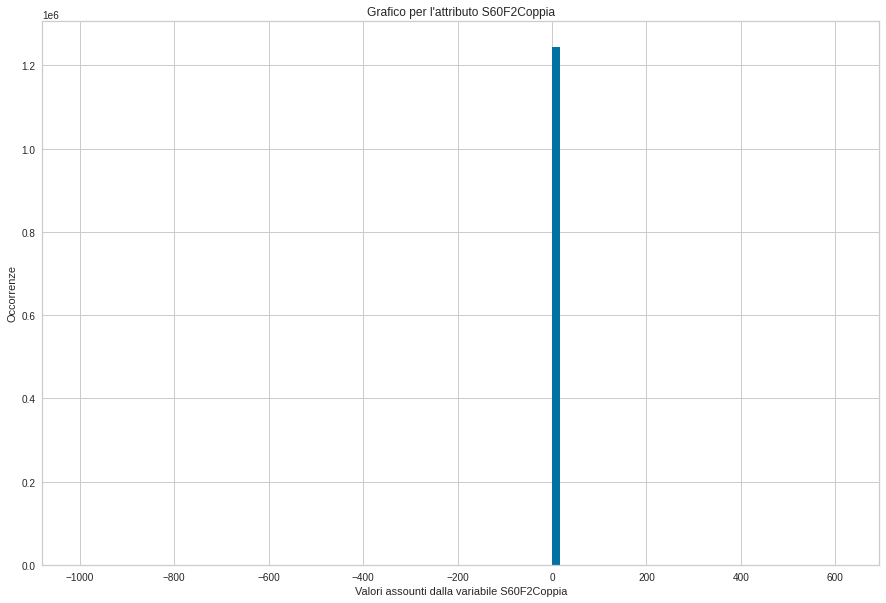

In [ ]:
plotgrafico(data2["S60F2Coppia"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S60F2Coppia) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

DMC  UltimaStazione  ... S40Vite3AngoloNorm S50TenutaPZNorm
122560   NaN              50  ...           0.373951        0.609068
429046   NaN              50  ...           0.429687        0.590616
532549   NaN              50  ...           0.413160        0.574073
564078   NaN              50  ...           0.386997        0.609068
692399   NaN              50  ...           0.389871        0.533200
717859   NaN              50  ...           0.413160        0.609068
721837   NaN              50  ...           0.402430        0.574073
748912   NaN              50  ...           0.413160        0.521841
811942   NaN              50  ...           0.425283        0.545581
822204   NaN              50  ...           0.434294        0.609068
857876   NaN              50  ...           0.405868        0.484329
876947   NaN              50  ...           0.421069        0.609068
877679   NaN              50  ...           0.402430        0.590616
888772   NaN              50  ...           0.402430        0.533200
917618   NaN              50  ...           0.402430        0.574073
918170   NaN              50  ...           0.425283        0.521841
998860   NaN              50  ...           0.402430        0.533200
1055759  NaN              50  ...           0.417032        0.653327
1063446  NaN              50  ...           0.399118        0.511375
1117447  NaN              50  ...           0.373951        0.559141
1145871  NaN              50  ...           0.392845        0.653327
1191208  NaN              50  ...           0.389871        0.653327

[22 rows x 56 columns]

IQR

36758


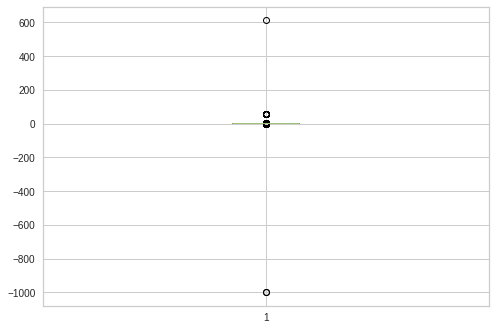

In [ ]:
Q1, Q3 = np.quantile(data2.S60F2Coppia, [0.25, 0.75])
IQR = iqr(data2.S60F2Coppia)
mask = (data2.S60F2Coppia < Q1 - 1.5 * IQR) | (data2.S60F2Coppia > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S60F2Coppia);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

1.9350001811981201 3.4149997234344482


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo più ampio che possa contenere i valori positivi limitati con un estremo superiore pari a 5

In [ ]:
temp = data2[(data2.S60F2Coppia >0) & (data2.S60F2Coppia <= 5)]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1243745
Gli outlier eliminati sono: 544
I dati finali sono: 1243201


36214


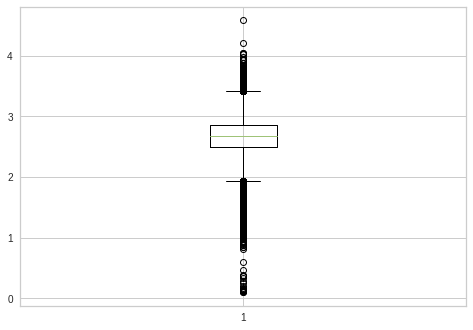

In [ ]:
Q1, Q3 = np.quantile(temp.S60F2Coppia, [0.25, 0.75])
IQR = iqr(temp.S60F2Coppia)
mask = (temp.S60F2Coppia < Q1 - 1.5 * IQR) | (temp.S60F2Coppia > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S60F2Coppia);

In [ ]:
data2 = data2[(data2.S60F2Coppia > 0) & (data2.S60F2Coppia <= 5)]

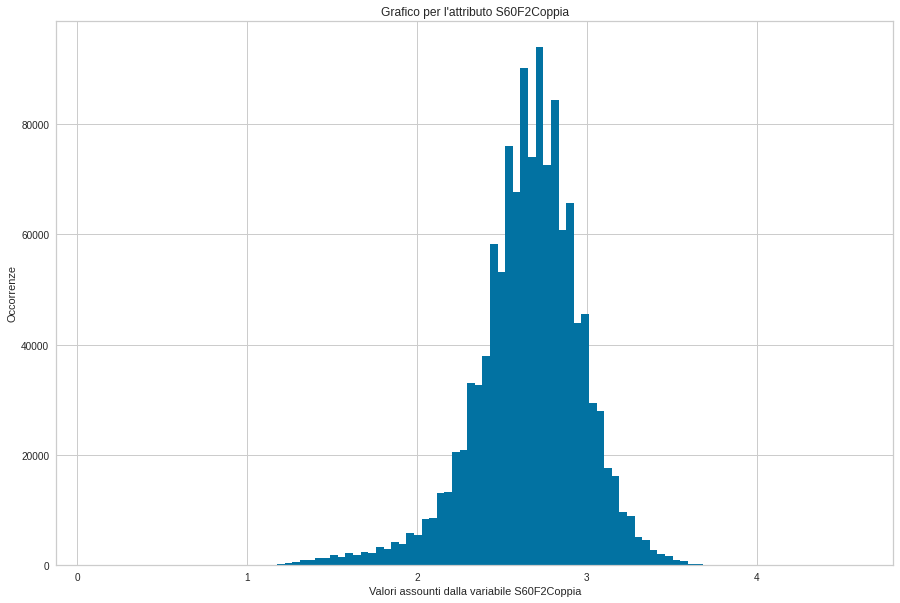

In [ ]:
plotgrafico(data2["S60F2Coppia"])

####S60F2DepresMin

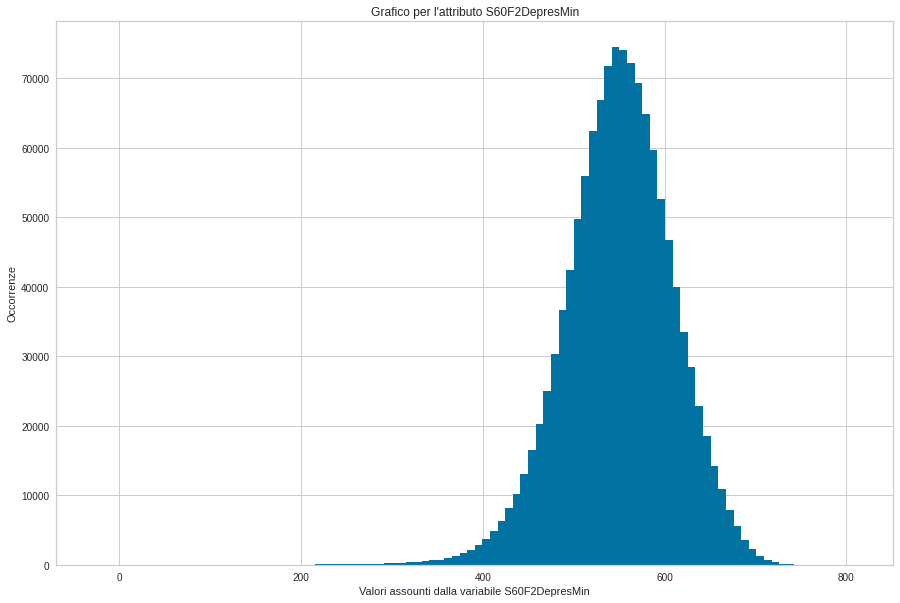

In [ ]:
plotgrafico(data2["S60F2DepresMin"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S60F2DepresMin) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

DMC  ...  S50TenutaPZNorm
4324     128209000052007302287100146508066R  ...         0.559141
7439                                    NaN  ...         0.680270
13882    128209000052007001968100146508066R  ...         0.574073
25317    128209000052006501223100146508066R  ...         0.559141
26637    128209000052006403094100146508066R  ...         0.574073
53794    128209000052005101916100146508066R  ...         0.559141
59338    128209000052004902332100146508066R  ...         0.545581
81436    128209000052003800386100146508066R  ...         0.609068
118896   128209000052002001035100146508066R  ...         0.609068
119515   128209000052002000413100146508066R  ...         0.590616
123461   128209000052001700905100146508066R  ...         0.590616
135269   128209000052001300406100146508066R  ...         0.533200
162775   128209000051935102218100146508066R  ...         0.533200
173425   128209000051934601926100146508066R  ...         0.559141
173457   128209000051934601927100146508066R  ...         0.590616
174222   128209000051934601130100146508066R  ...         0.609068
180247   128209000051934401029100146508066R  ...         0.574073
181276   128209000051934400003100146508066R  ...         0.629808
185107   128209000051934002702100146508066R  ...         0.559141
186784   128209000051934001038100146508066R  ...         0.574073
188370   128209000051933902447100146508066R  ...         0.590616
189235   128209000051933901593100146508066R  ...         0.574073
224382                                  NaN  ...         0.501693
232150                                  NaN  ...         0.711508
293067   128209000051929102278100146508066R  ...         0.653327
475513   128209000051920301923100146508066R  ...         0.609068
546806   128209000051917201637100146508066R  ...         0.680270
550557   128209000051917100896100146508066R  ...         0.653327
570466   128209000051916202134100146508066R  ...         0.792164
614506                                  NaN  ...         0.533200
821369   128209000051905900636100146508066R  ...         0.511375
852523   128209000051904500782100146508066R  ...         0.559141
904118   128209000051901900002100146508066R  ...         0.492703
1073134  128209000051828401455100146508066R  ...         0.574073
1120250  128209000051825500477100146508066R  ...         0.609068
1140893  128209000051823600437100146508066R  ...         0.590616
1142111  128209000051823500446100146508066R  ...         0.590616
1143030  128209000051823400854100146508066R  ...         0.590616
1143069  128209000051823400813100146508066R  ...         0.609068
1146519  128209000051821600051100146508066R  ...         0.609068
1147532                                 NaN  ...         0.574073
1147598  128209000051821500461100146508066R  ...         0.653327
1151970  128209000051821201283100146508066R  ...         0.629808
1165615  128209000051819100244100146508066R  ...         0.590616
1171714  128209000051818300052100146508066R  ...         0.609068
1243475  128209000051613900036100146508066R  ...         0.533200

[46 rows x 56 columns]

IQR

15788


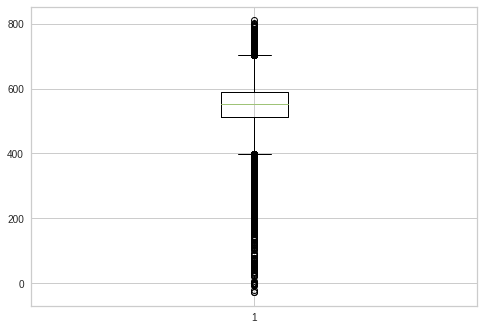

In [ ]:
Q1, Q3 = np.quantile(data2.S60F2DepresMin, [0.25, 0.75])
IQR = iqr(data2.S60F2DepresMin)
mask = (data2.S60F2DepresMin < Q1 - 1.5 * IQR) | (data2.S60F2DepresMin > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S60F2DepresMin);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

398.60009765625 703.39990234375


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo più ampio che possa contenere tutti i valori superiori ad un valore di poco più piccolo dell'intervallo di accettazione

In [ ]:
temp = data2[(data2.S60F2DepresMin >= 300)]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1243201
Gli outlier eliminati sono: 1599
I dati finali sono: 1241602


14303


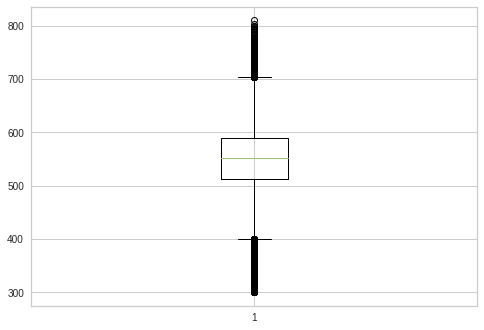

In [ ]:
Q1, Q3 = np.quantile(temp.S60F2DepresMin, [0.25, 0.75])
IQR = iqr(temp.S60F2DepresMin)
mask = (temp.S60F2DepresMin < Q1 - 1.5 * IQR) | (temp.S60F2DepresMin > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S60F2DepresMin);

In [ ]:
data2 = data2[(data2.S60F2DepresMin >= 300)]

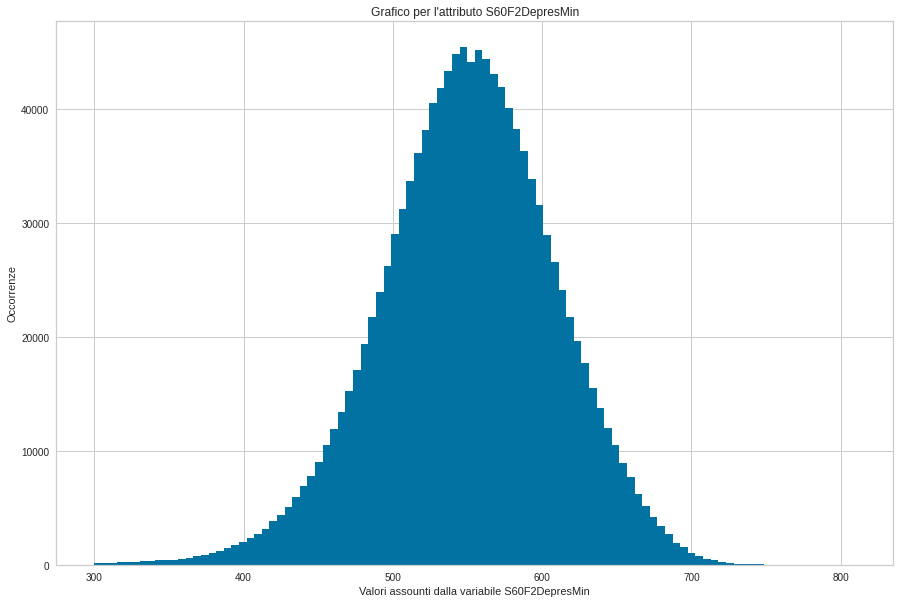

In [ ]:
plotgrafico(data2["S60F2DepresMin"])

####S60F2Velocita

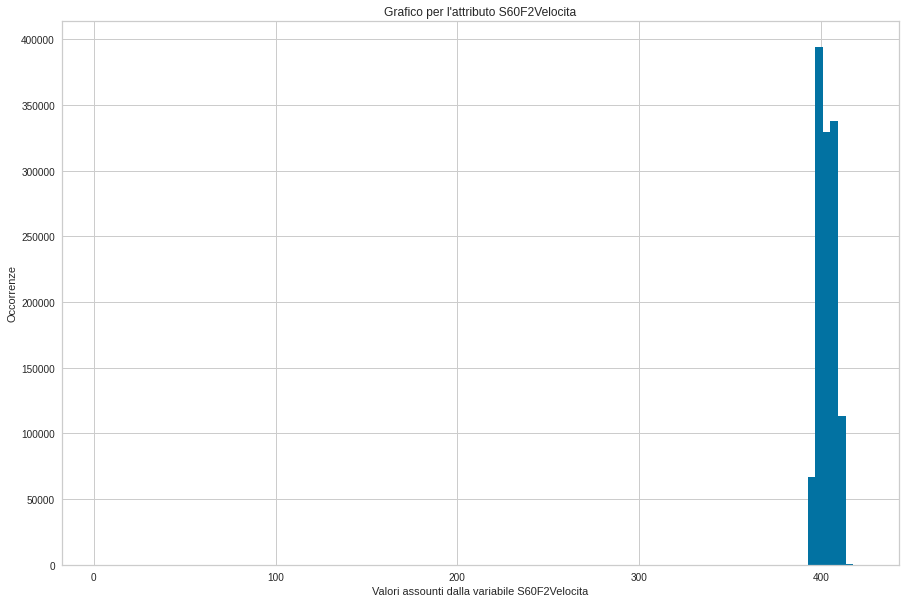

In [ ]:
plotgrafico(data2["S60F2Velocita"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S60F2Velocita) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

DMC  ...  S50TenutaPZNorm
1099512  128209000051826901848100146508066R  ...         0.545581
1106732  128209000051826400001100146508066R  ...         0.609068
1106735  128209000051826400006100146508066R  ...         0.545581
1106737  128209000051826400007100146508066R  ...         0.533200
1106738  128209000051826400004100146508066R  ...         0.511375

[5 rows x 56 columns]

IQR

24


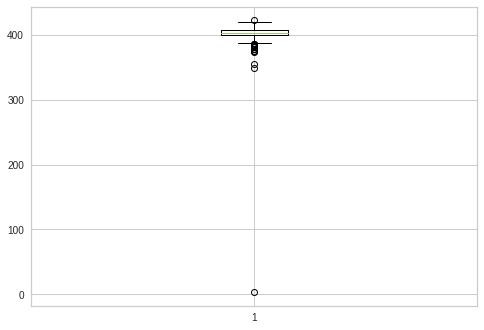

In [ ]:
Q1, Q3 = np.quantile(data2.S60F2Velocita, [0.25, 0.75])
IQR = iqr(data2.S60F2Velocita)
mask = (data2.S60F2Velocita < Q1 - 1.5 * IQR) | (data2.S60F2Velocita > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S60F2Velocita);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

385.5 421.5


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo più ampio che possa contenere i valori di poco inferiori rispetto all'intervallo di accettazione e limitati superiormente a poco più del valore massimo di accettazione

In [ ]:
temp = data2[(data2.S60F2Velocita >= 370) & (data2.S60F2Velocita <= 430)]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1241602
Gli outlier eliminati sono: 3
I dati finali sono: 1241599


21


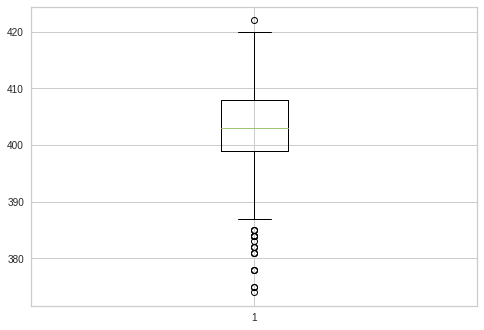

In [ ]:
Q1, Q3 = np.quantile(temp.S60F2Velocita, [0.25, 0.75])
IQR = iqr(temp.S60F2Velocita)
mask = (temp.S60F2Velocita < Q1 - 1.5 * IQR) | (temp.S60F2Velocita > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S60F2Velocita);

In [ ]:
data2 = data2[(data2.S60F2Velocita >= 370) & (data2.S60F2Velocita <= 430)]

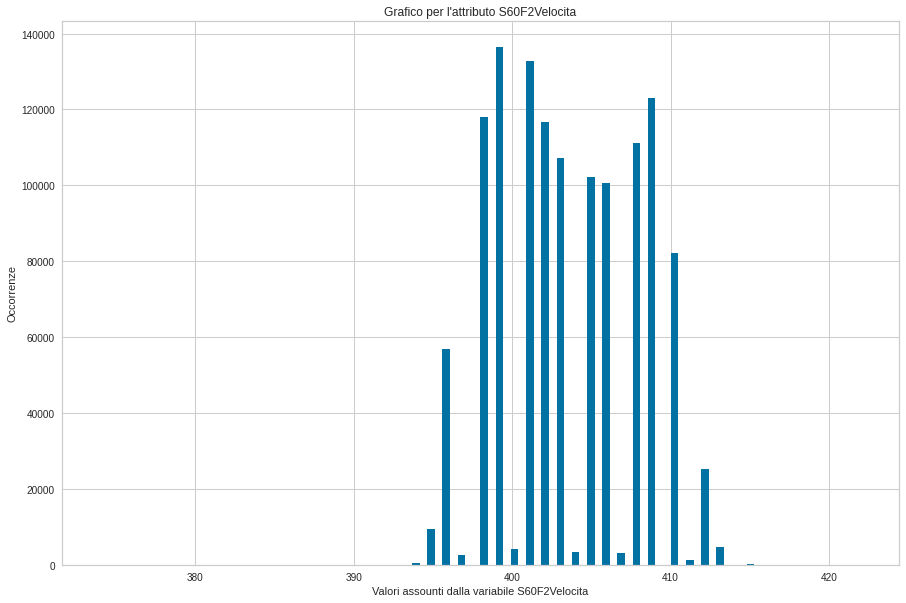

In [ ]:
plotgrafico(data2["S60F2Velocita"])

####S60F2TenutaVNR

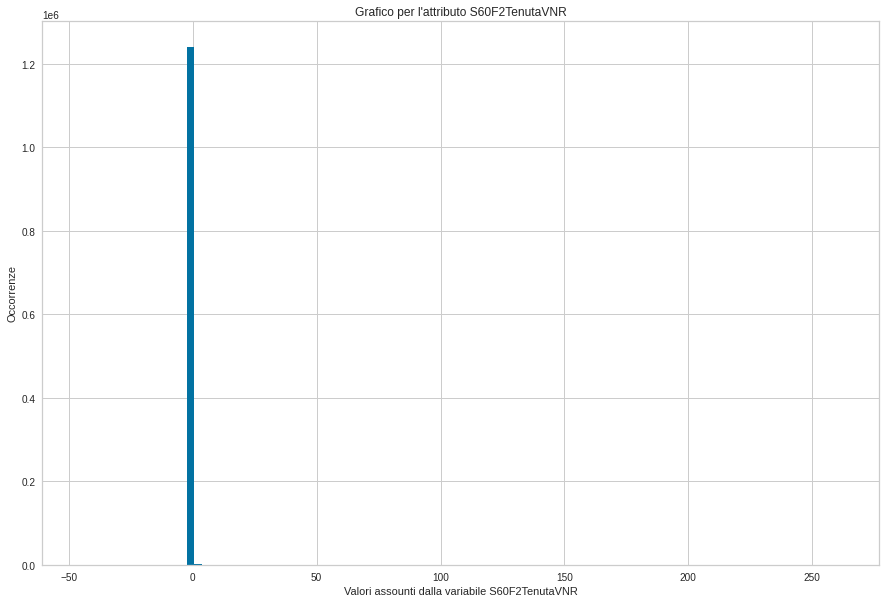

In [ ]:
plotgrafico(data2["S60F2TenutaVNR"])

Si controlla la presenza di valori outlier con una analisi univariata

ZScore

In [ ]:
mask = np.abs(zscore(data2.S60F2TenutaVNR) > 3.5)
idx = np.where(mask)
vals = data2.iloc[idx]
vals

DMC  ...  S50TenutaPZNorm
2296                                    NaN  ...         0.574073
9666                                    NaN  ...         0.590616
13625    128209000052007002237100146508066R  ...         0.590616
28901                                   NaN  ...         0.590616
32984                                   NaN  ...         0.590616
...                                     ...  ...              ...
1144670                                 NaN  ...         0.680270
1148464                                 NaN  ...         0.629808
1174090                                 NaN  ...         0.559141
1205149                                 NaN  ...         0.629808
1237288  128209000051731300167100146508066R  ...         0.653327

[223 rows x 56 columns]

IQR

1107


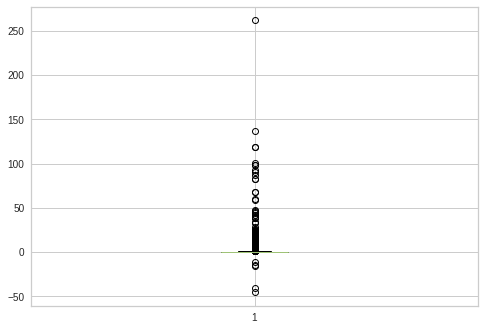

In [ ]:
Q1, Q3 = np.quantile(data2.S60F2TenutaVNR, [0.25, 0.75])
IQR = iqr(data2.S60F2TenutaVNR)
mask = (data2.S60F2TenutaVNR < Q1 - 1.5 * IQR) | (data2.S60F2TenutaVNR > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = data2.iloc[idx]
print(len(vals))

plt.boxplot(data2.S60F2TenutaVNR);

In [ ]:
print((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR))

-0.10000000149011612 0.7000000104308128


I valori che sono ottenuti tramite questa procedura sono molto restrittivi, si procede a considerare un intervallo contenente i valori positivi (0 compreso) limitati superiormente da poco più del valore massimo dell'intervallo di accettazione

In [ ]:
temp = data2[(data2.S60F2TenutaVNR >= 0) & (data2.S60F2TenutaVNR <= 3.5)]
print("I dati iniziali sono: " + str(len(data2)))
print("Gli outlier eliminati sono: " + str(len(data2)-len(temp)))
print("I dati finali sono: " + str(len(temp)))

I dati iniziali sono: 1241599
Gli outlier eliminati sono: 149
I dati finali sono: 1241450


966


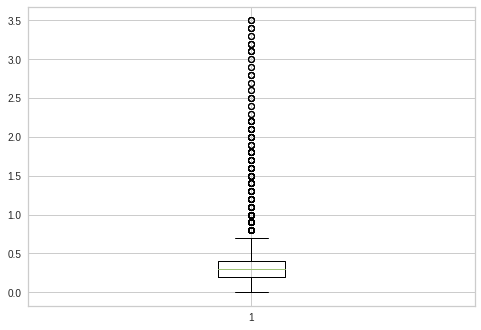

In [ ]:
Q1, Q3 = np.quantile(temp.S60F2TenutaVNR, [0.25, 0.75])
IQR = iqr(temp.S60F2TenutaVNR)
mask = (temp.S60F2TenutaVNR < Q1 - 1.5 * IQR) | (temp.S60F2TenutaVNR > Q3 + 1.5 * IQR)
idx = np.where(mask)
vals = temp.iloc[idx]
print(len(vals))

plt.boxplot(temp.S60F2TenutaVNR);

In [ ]:
data2 = data2[(data2.S60F2TenutaVNR >= 0) & (data2.S60F2TenutaVNR <= 3.5)]

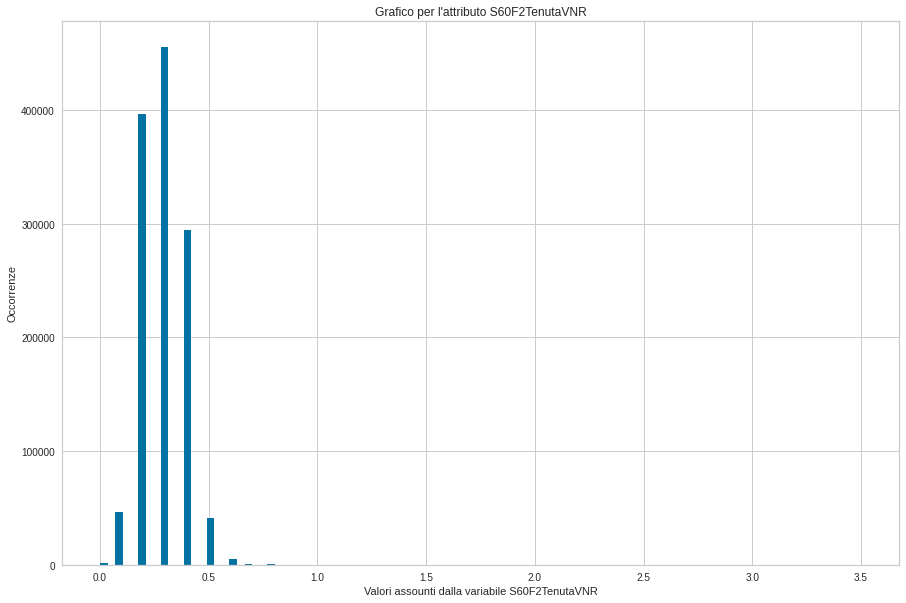

In [ ]:
plotgrafico(data2["S60F2TenutaVNR"])

###Analisi di Regressione

###Regressione sulla variabile S60F2Coppia

Matrice di correlazione sulle variabili di data2

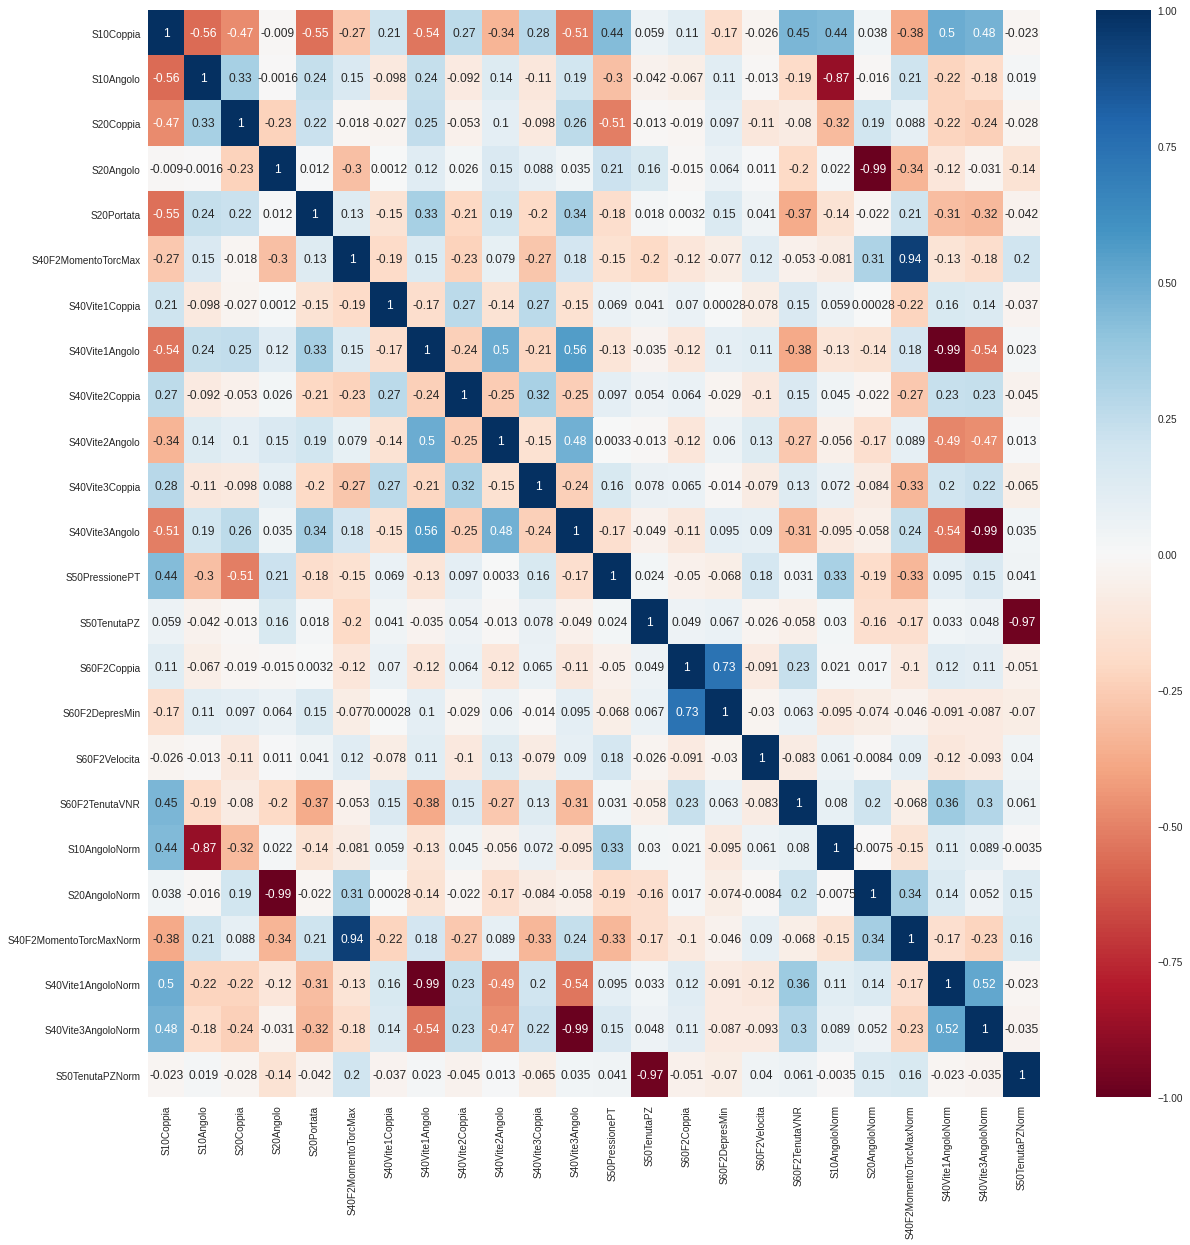

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S60].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("S60F2Coppia ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo + S50PressionePT + S50TenutaPZ", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            S60F2Coppia   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5062.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:19:08   Log-Likelihood:            -2.7029e+05
No. Observations:             1241450   AIC:                         5.406e+05
Df Residuals:                 1241438   BIC:                         5.408e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.8305    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 26820.38946414704, 'LM-Test p-value': 0.0, 'F-Statistic': 2492.031717232172, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

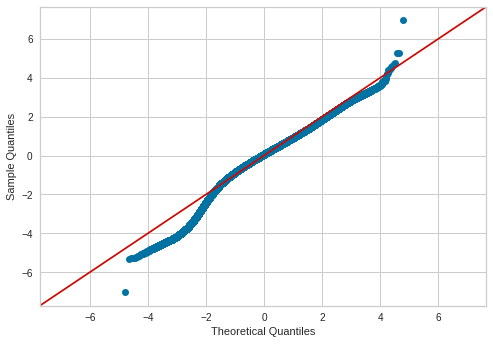

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

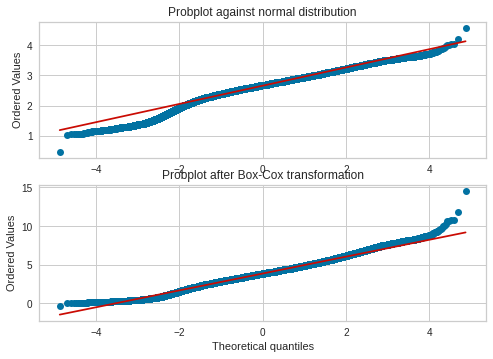

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(data2["S60F2Coppia"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(data2["S60F2Coppia"])
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(var_norm, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5090.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:19:29   Log-Likelihood:            -1.8469e+06
No. Observations:             1241450   AIC:                         3.694e+06
Df Residuals:                 1241438   BIC:                         3.694e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8315    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 25127.278173545998, 'LM-Test p-value': 0.0, 'F-Statistic': 2331.465415569763, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

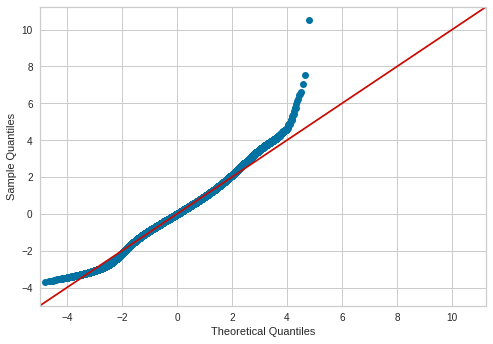

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Gli esiti per il modello, con la variabile dipendente normalizzata e non, hanno portato a considerare poco informativa la relazione, in quanto non sono soddisfatte le ipotesi del modello lineare classico (in particolare la normalità dei residui).
<br>Per poter sistemare il problema sarebbe necessario eliminare degli outlier, ma ciò porterebbe a minacciare la veridicità del modello eliminando osservazioni importanti.

###Regressione sulla variabile S60F2DepresMin

Matrice di correlazione sulle variabili di data2

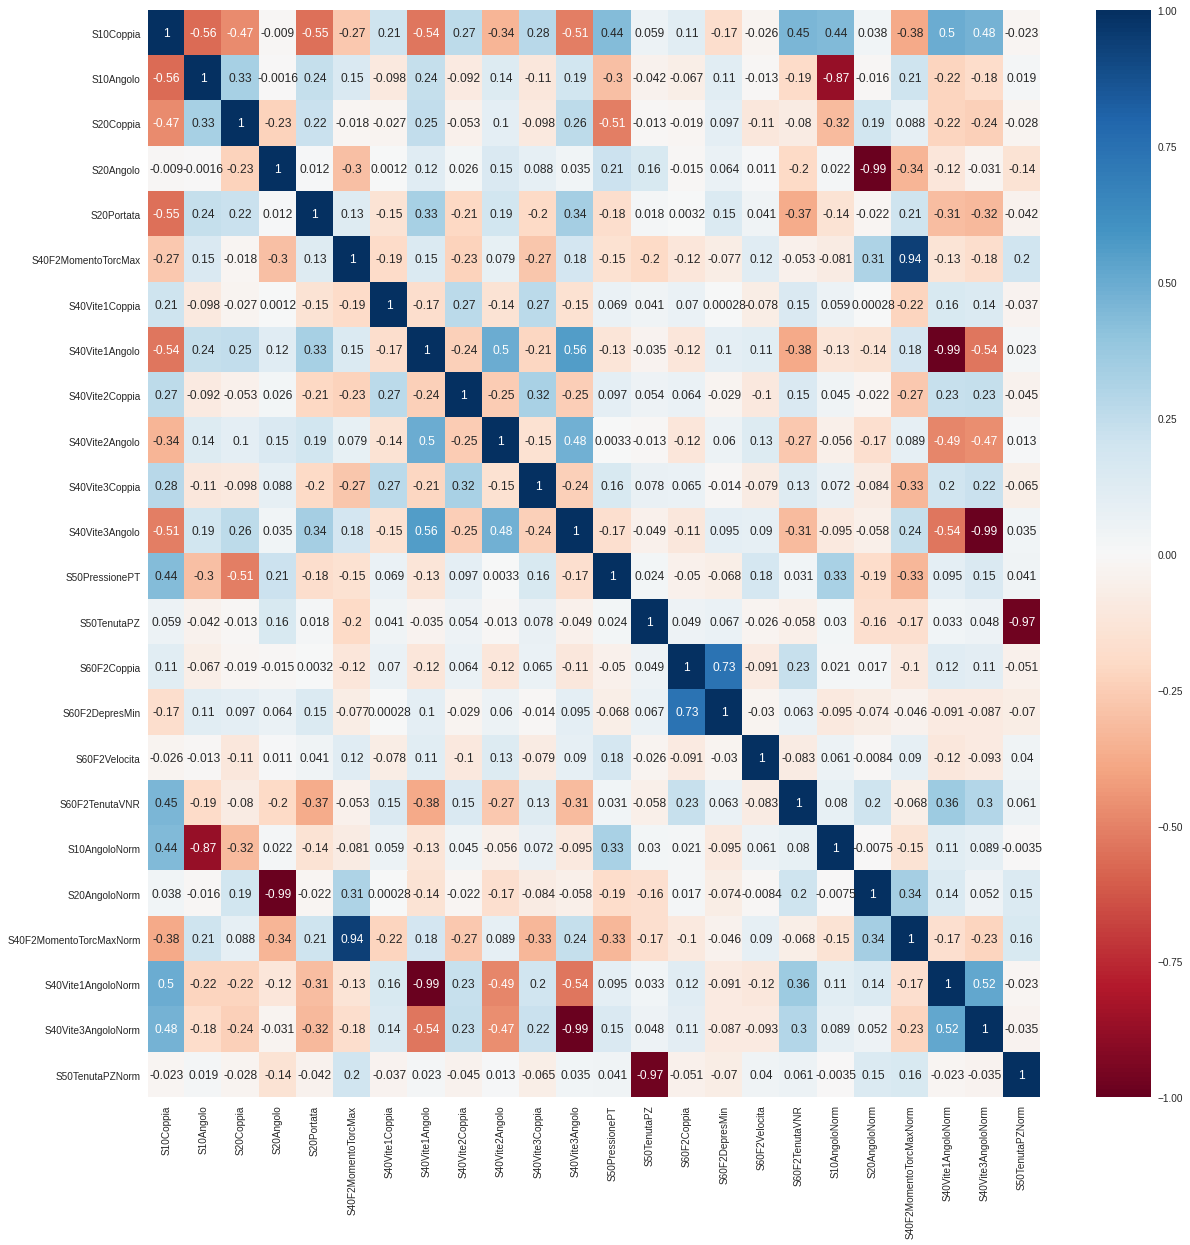

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S60].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("S60F2DepresMin ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo + S50PressionePT + S50TenutaPZ", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         S60F2DepresMin   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5080.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:            -6.7832e+06
No. Observations:             1241450   AIC:                         1.357e+07
Df Residuals:                 1241438   BIC:                         1.357e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             122.7000    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 20344.8232535585, 'LM-Test p-value': 0.0, 'F-Statistic': 1880.3262048793067, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

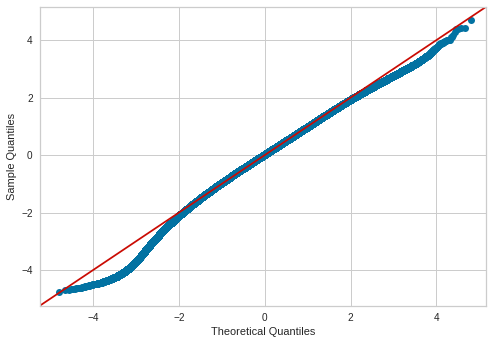

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

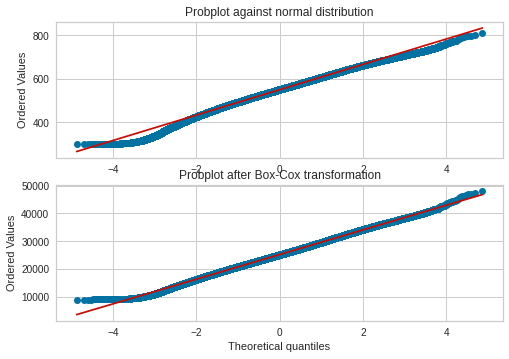

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(data2["S60F2DepresMin"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(data2["S60F2DepresMin"])
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(var_norm, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     5075.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:20:11   Log-Likelihood:            -1.2161e+07
No. Observations:             1241450   AIC:                         2.432e+07
Df Residuals:                 1241438   BIC:                         2.432e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6866.9331   1

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 22013.304324964174, 'LM-Test p-value': 0.0, 'F-Statistic': 2037.3156788852737, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

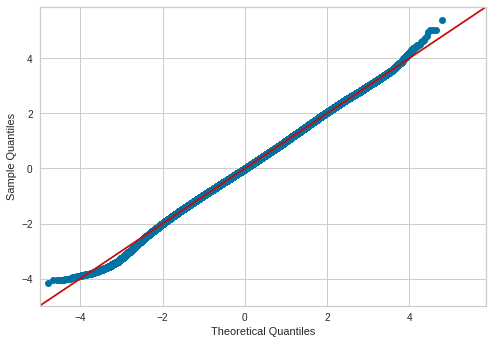

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Si osserva che la distribuzione dei residui è approssimabile ad una distribuzione normale; Si utilizza il test di Shapiro Wilk per poter verificare la normalità e autocorrelazione dei residui.

In [ ]:
stats.shapiro(residui)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9999900460243225, 0.3159928619861603)

Si osserva che la statistica test tende ad 1, si può convalidare l'idea che la nostra distribuzione sia normale. <br>Si procede a risolvere il problema di Omoschedasticità e Autocorrelaizone dei residui

In [ ]:
glsar_model = sm.GLSAR(var_norm, X, 2)
glsar_results = glsar_model.iterative_fit(2)
print(glsar_results.summary())

                           GLSAR Regression Results                           
Dep. Variable:                      y   R-squared:                       0.008
Model:                          GLSAR   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     950.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:20:29   Log-Likelihood:            -1.1967e+07
No. Observations:             1241448   AIC:                         2.393e+07
Df Residuals:                 1241436   BIC:                         2.393e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.534e+04   1

### Regressione con dataset campionato per Matrice di Toeplitz

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from scipy.linalg import toeplitz

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data_class_res = resample(data2, n_samples = 500, random_state = 2020, replace = False, stratify = data2['S60F2DepresMin'])

In [ ]:
y, X = dmatrices("S60F2DepresMin ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo + S50PressionePT + S50TenutaPZ", data = data_class_res, return_type = "dataframe")

#### Test 500

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         S60F2DepresMin   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.505
Date:                Sun, 19 Jul 2020   Prob (F-statistic):              0.126
Time:                        15:20:30   Log-Likelihood:                -2058.3
No. Observations:                 500   AIC:                             4141.
Df Residuals:                     488   BIC:                             4191.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -51.4804    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 14.788999629472887, 'LM-Test p-value': 0.19236185466784692, 'F-Statistic': 1.3521824551439827, 'F-Test p-value': 0.19249037696609925}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   82364.719653            Intercept
1       1.593424            S20Coppia
2       1.317827            S20Angolo
3       1.168557           S20Portata
4       1.407144  S40F2MomentoTorcMax
5       1.172444       S40Vite1Coppia
6       1.405797       S40Vite1Angolo
7       1.187546       S40Vite2Coppia
8       1.246514       S40Vite3Coppia
9       1.392627       S40Vite3Angolo
10      1.542085       S50PressionePT
11      1.059092          S50TenutaPZ

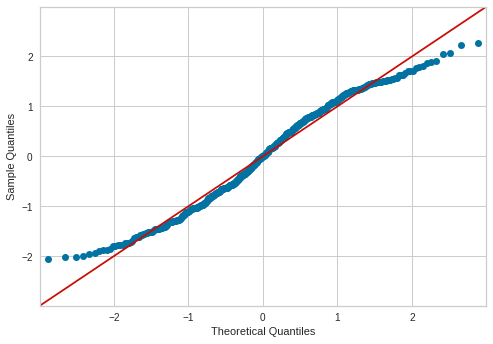

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

#### Box&Cox

In [ ]:
from sklearn.decomposition import PCA
result = PCA(data_class_res)

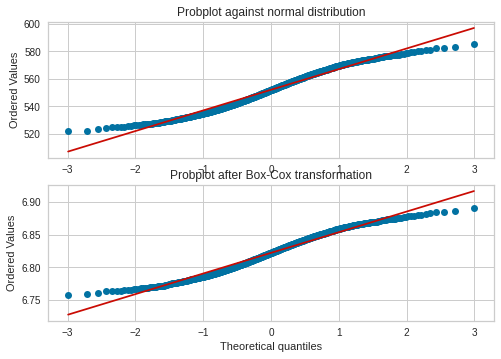

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(data_class_res["S60F2DepresMin"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(data_class_res["S60F2DepresMin"])
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(var_norm, X).fit()
residui = mod.resid
print(mod.summary())

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 14.527126572981718, 'LM-Test p-value': 0.20518445141833097, 'F-Statistic': 1.3275224960415097, 'F-Test p-value': 0.20551284222391147}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   82364.719653            Intercept
1       1.593424            S20Coppia
2       1.317827            S20Angolo
3       1.168557           S20Portata
4       1.407144  S40F2MomentoTorcMax
5       1.172444       S40Vite1Coppia
6       1.405797       S40Vite1Angolo
7       1.187546       S40Vite2Coppia
8       1.246514       S40Vite3Coppia
9       1.392627       S40Vite3Angolo
10      1.542085       S50PressionePT
11      1.059092          S50TenutaPZ

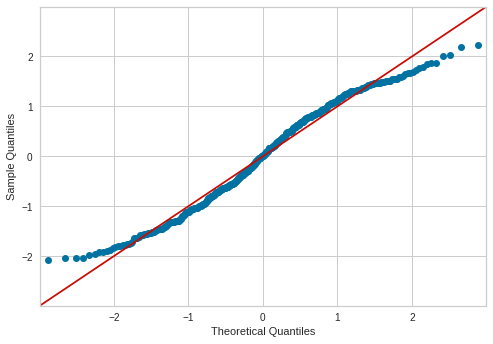

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Si evidenzia comunque la presenza di autocorrelazione ed eteroschedasticità dei residui, per cui si applicano i Generalized Least Squares


In [ ]:
order = toeplitz(range(len(residui)))

In [ ]:
rho = mod.params[1]

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
y = y.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
sigma = rho**order
X = sm.add_constant(X)
gls_model = sm.GLS(y, X, sigma=sigma)
#residui = gls_model.resid
gls_results = gls_model.fit()

In [ ]:
gls_results

In [ ]:
print(gls_results.summary())

                            GLS Regression Results                            
Dep. Variable:         S60F2DepresMin   R-squared:                       0.033
Model:                            GLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.511
Date:                Sun, 19 Jul 2020   Prob (F-statistic):              0.124
Time:                        15:20:52   Log-Likelihood:                -2057.2
No. Observations:                 500   AIC:                             4138.
Df Residuals:                     488   BIC:                             4189.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -44.7428    

L'applicazione del modello GLS tramite matrice di Toeplitz richiede un numero estremamente ridotto di osservazioni (all'incirca 500) in quanto risulta estremamente onerosa sia la costruzione della Matrice che il fitting del modello: i risultati ottenuti in seguito all'applicazione dei test sono in linea con quelli eseguiti sull'intero dataset. ATTENZIONE Il p-value ottenuto dal test di normalità viene valutato su 500 osservazioni e per tale motivo non risulta influenzato dalla numerosità delle osservazioni, pertanto è certo che la normalità dei residui non si verifichi. Si decide comunque di proseguire con l'analisi rispettando l'assunzione fatta in precedenza sull'intero dataset.

L'applicazione del modello GLS alla regressione non ha portato miglioramenti evidenti all'autocorrelazione presente tra le variabili (da 1.815 a 1.867). Inoltre l'esecuzione di questa operazione fa intendere di aver risolto l'eteroschedasticità dei residui, tuttavia non è possibile verificare questa teoria in quanto la libreria utilizzata non permette l'accesso ai residui e questi non sono calcolabili manualmente. In ogni caso la normalità continua a non essere presente secondo il test di Jarque-Bera.

###Regressione sulla variabile S60F2Velocità

Matrice di correlazione sulle variabili di data2

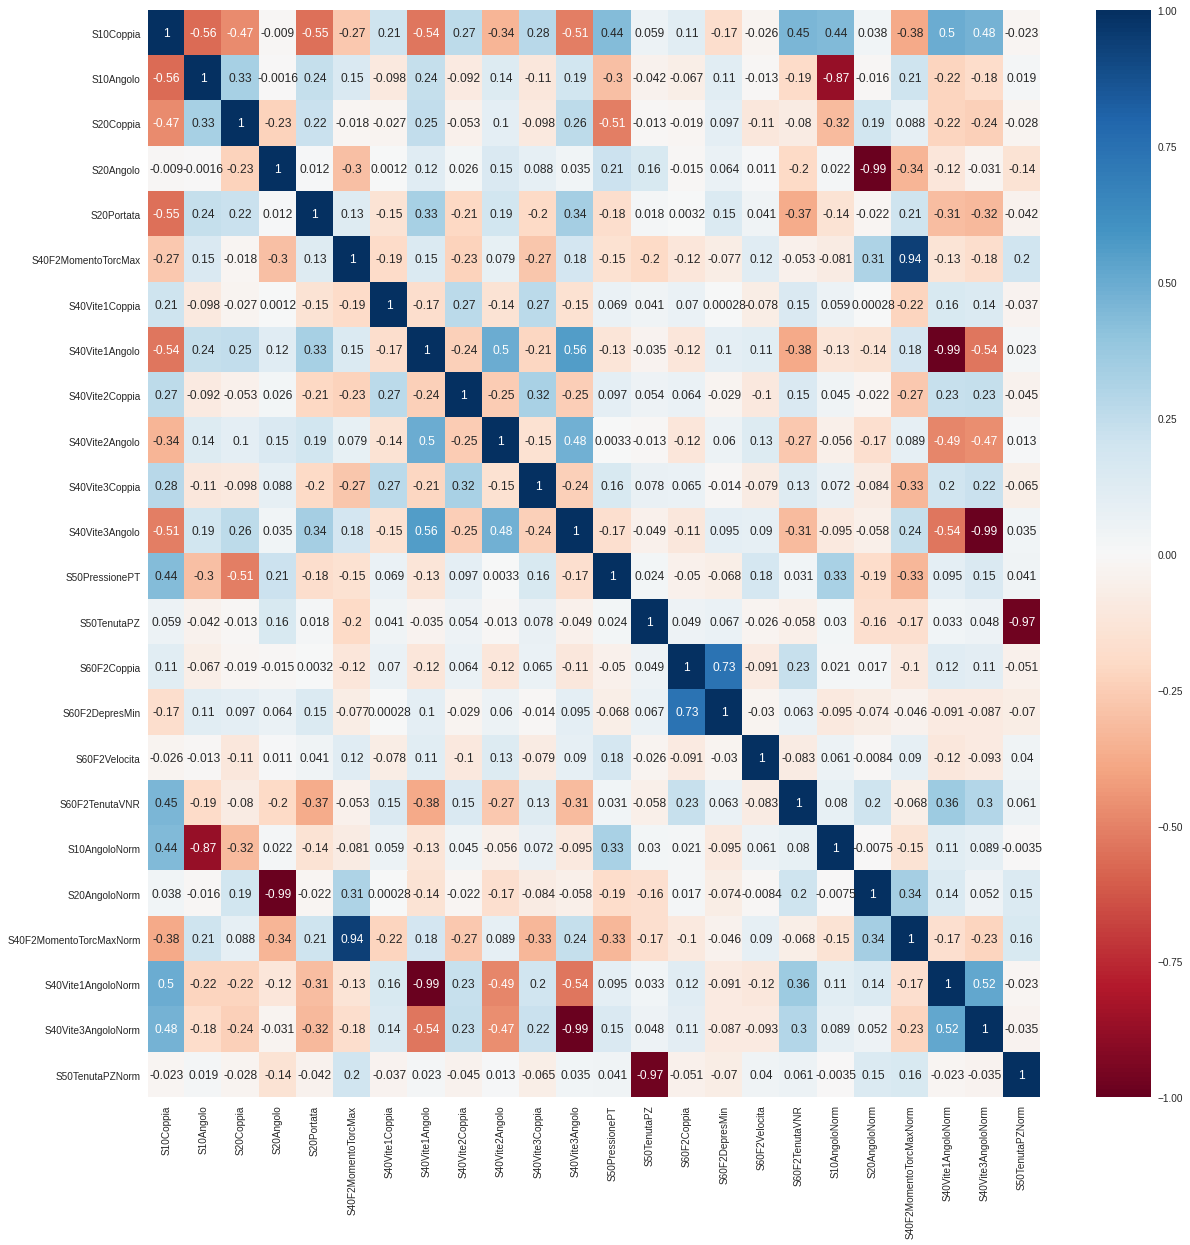

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S60].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("S60F2Velocita ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo + S50PressionePT + S50TenutaPZ", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:          S60F2Velocita   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     9440.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:38:27   Log-Likelihood:            -3.5564e+06
No. Observations:             1241450   AIC:                         7.113e+06
Df Residuals:                 1241438   BIC:                         7.113e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             423.2952    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 15155.357701838113, 'LM-Test p-value': 0.0, 'F-Statistic': 1394.7735727758165, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

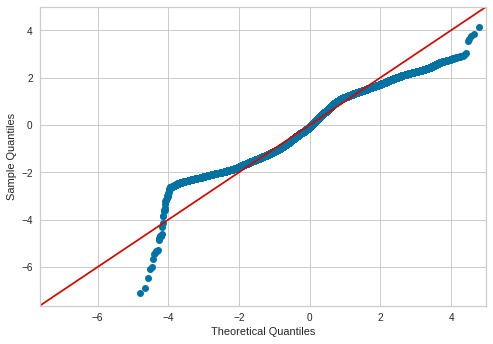

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

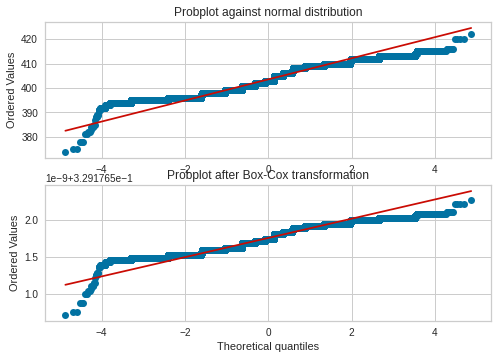

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(data2["S60F2Velocita"], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(data2["S60F2Velocita"])
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(var_norm, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     9353.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:38:58   Log-Likelihood:             2.6522e+07
No. Observations:             1241450   AIC:                        -5.304e+07
Df Residuals:                 1241438   BIC:                        -5.304e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.3292   3

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 14160.007622708887, 'LM-Test p-value': 0.0, 'F-Statistic': 1302.112907470367, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

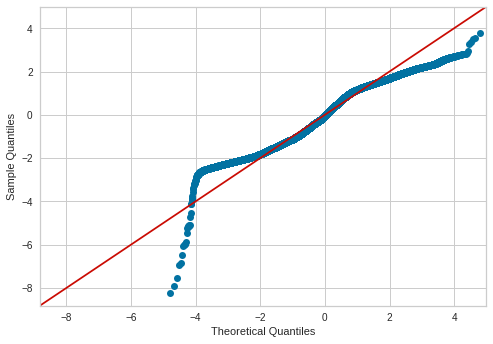

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

Il modello presenta in origine una distribuzione dei residui non normale, procedendo per gradi di problema è stato quindi considerato l'utilizzo dell'algoritmo Box & Cox per poter applicare una funzione di trasformazione alla variabile dipendente con lo scopo di ottenere un modello caratterizzato dalla normalità dei residui.<br> Si considera quindi l'ultimo modello che viene prodotto, si può decretare dal grafico posizionato sopra che i residui non sono distribuiti normalmente. Tale problematica è risolvibile solo tramite una rimozione dei valori outlier dei residui, associati a valori outlier della variabile dipendente; col fine di evitare di falsare il modello filtrando solo le osservazioni "comode" e non realistiche si decreta che non è possibile procedere ulteriormente.

###Regressione sulla variabile S60F2TenutaVNR

Matrice di correlazione sulle variabili di data2

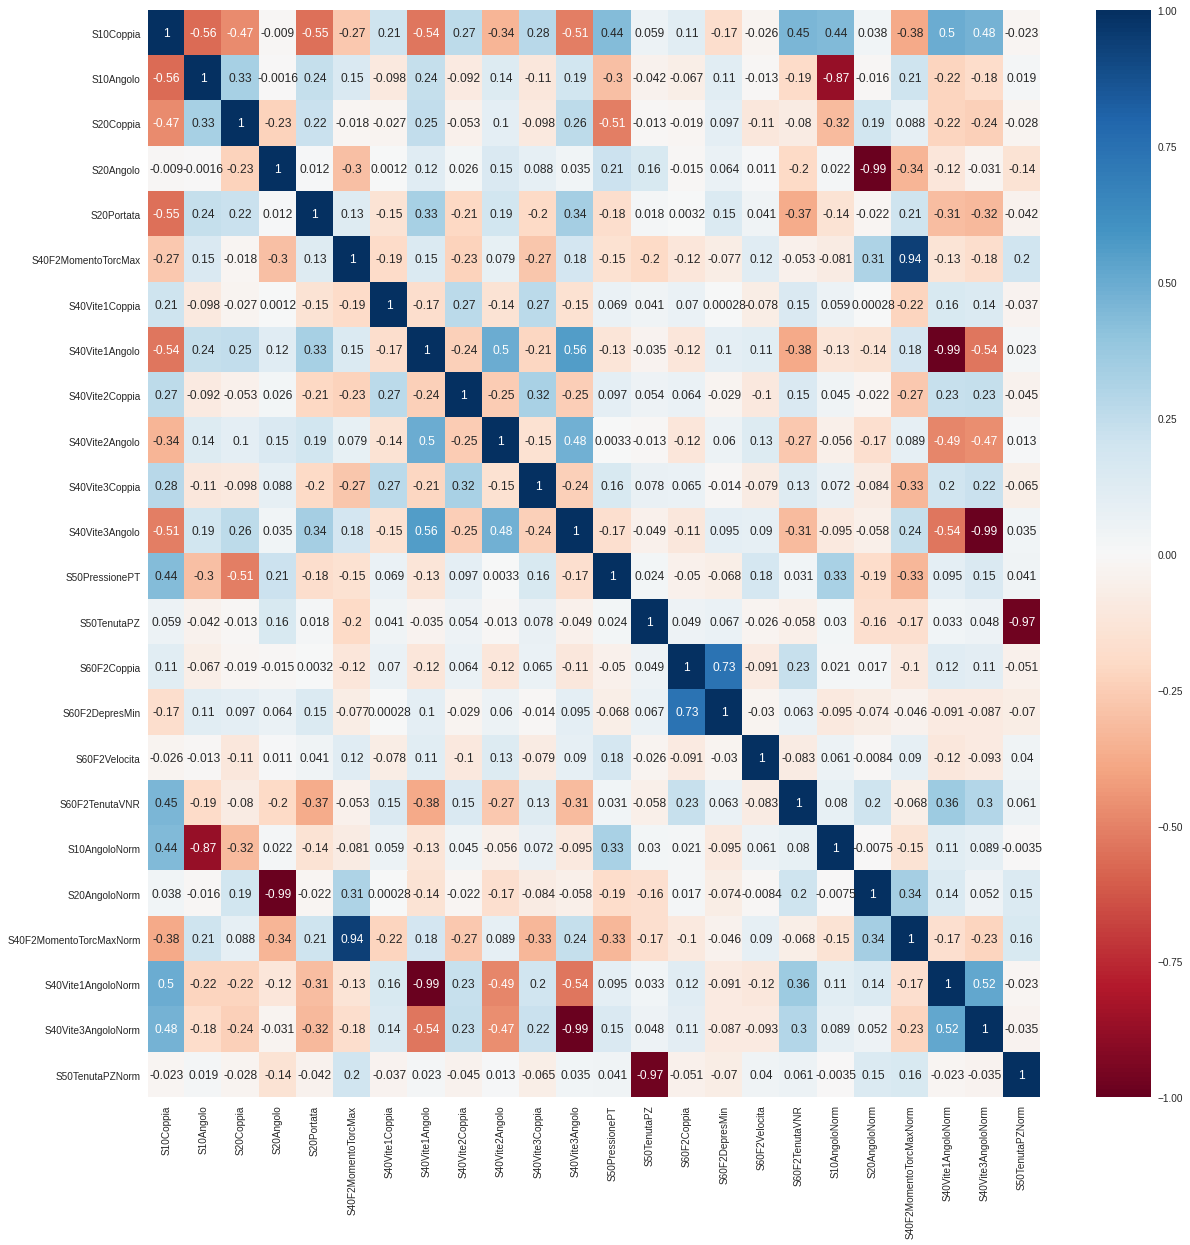

In [ ]:
plt.figure(figsize = (20, 20))
correlazione = data2[variabili_S60].corr()
sns.heatmap(correlazione, cmap = "RdBu", vmin = -1, vmax = 1, annot = True)

Formula della regressione

In [ ]:
y, X = dmatrices("S60F2TenutaVNR ~ S20Coppia + S20Angolo + S20Portata + S40F2MomentoTorcMax + S40Vite1Coppia + S40Vite1Angolo + S40Vite2Coppia + S40Vite3Coppia + S40Vite3Angolo + S50PressionePT + S50TenutaPZ", data = data2, return_type = "dataframe")

In [ ]:
mod = sm.OLS(y, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:         S60F2TenutaVNR   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                 3.751e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:44:52   Log-Likelihood:             1.2970e+06
No. Observations:             1241450   AIC:                        -2.594e+06
Df Residuals:                 1241438   BIC:                        -2.594e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8965    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 1591.6655193604222, 'LM-Test p-value': 0.0, 'F-Statistic': 144.88121923963928, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

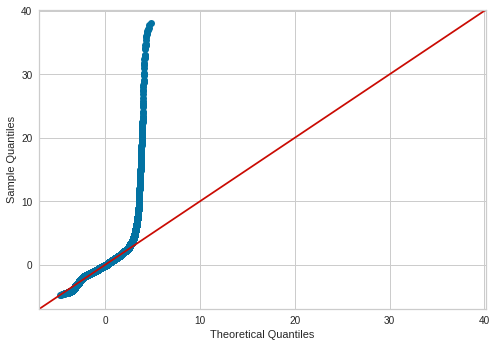

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

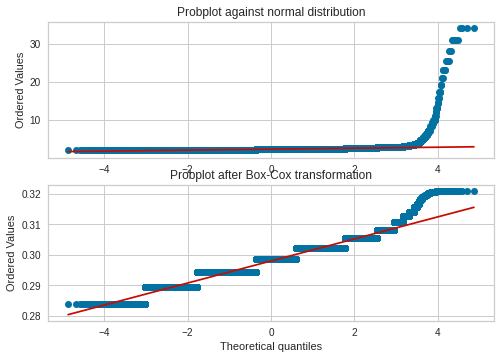

In [ ]:
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
stats.probplot(np.exp(data2["S60F2TenutaVNR"])+1, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
var_norm, _ = stats.boxcox(np.exp(data2["S60F2TenutaVNR"])+1)
stats.probplot(var_norm, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [ ]:
mod = sm.OLS(np.log(var_norm)-1, X).fit()
residui = mod.resid
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                 4.357e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:45:23   Log-Likelihood:             3.8492e+06
No. Observations:             1241450   AIC:                        -7.698e+06
Df Residuals:                 1241438   BIC:                        -7.698e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.1249    

In [ ]:
bp_test = het_breuschpagan(residui,  X)
labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))

{'LM Statistic': 22692.885300883554, 'LM-Test p-value': 0.0, 'F-Statistic': 2101.381496279009, 'F-Test p-value': 0.0}


In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor             features
0   77475.748562            Intercept
1       1.580032            S20Coppia
2       1.278168            S20Angolo
3       1.227355           S20Portata
4       1.338180  S40F2MomentoTorcMax
5       1.146554       S40Vite1Coppia
6       1.597718       S40Vite1Angolo
7       1.235638       S40Vite2Coppia
8       1.253228       S40Vite3Coppia
9       1.585017       S40Vite3Angolo
10      1.424209       S50PressionePT
11      1.059642          S50TenutaPZ

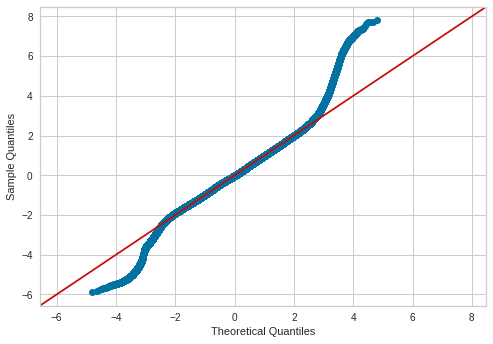

In [ ]:
a = qqplot(residui, scipy.stats.distributions.norm, fit = True, line = "45")
plt.show()

È evidente dal grafico che non vi è presenza di normalità dei residui, nonostante con l'algoritmo Box & Cox si procede a trasformare la variabile dipendente con lo scopo di tradurre il modello in un modello caratterizzato da normalità dei residui.
<br>Per poter eliminare il problema sarebbe necessario eliminare degli outlier, ma ciò porterebbe a minacciare la veridicità del modello eliminando osservazioni importanti. Persistono oltretutto problematiche di Eteroschedasticità e Autocorrelazione dei residui.